In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
import scipy.stats as stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import plotly_express as px
from time import process_time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV,cross_val_score
from sklearn import metrics
import time
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'C:\Users\RAJAT DEVARAKONDA\Desktop\projects\hotel booking cancel pred\hotel_bookings.csv')

In [6]:
df.shape 

(119390, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
pd.set_option('display.max_columns',32)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [543]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [544]:
#Average Daily Rate min is in negative

#The average daily rate is calculated by taking the average revenue earned from rooms and 
#dividing it by the number of rooms sold. It excludes complimentary rooms and rooms occupied by staff.

In [545]:
#summary for discrete features
df.describe(include='O').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [546]:
#we have customers from 117 dif countries 


In [547]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [548]:
df.isnull().mean()[df.isnull().mean()>0]*100
# % of null values in missing data columns

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

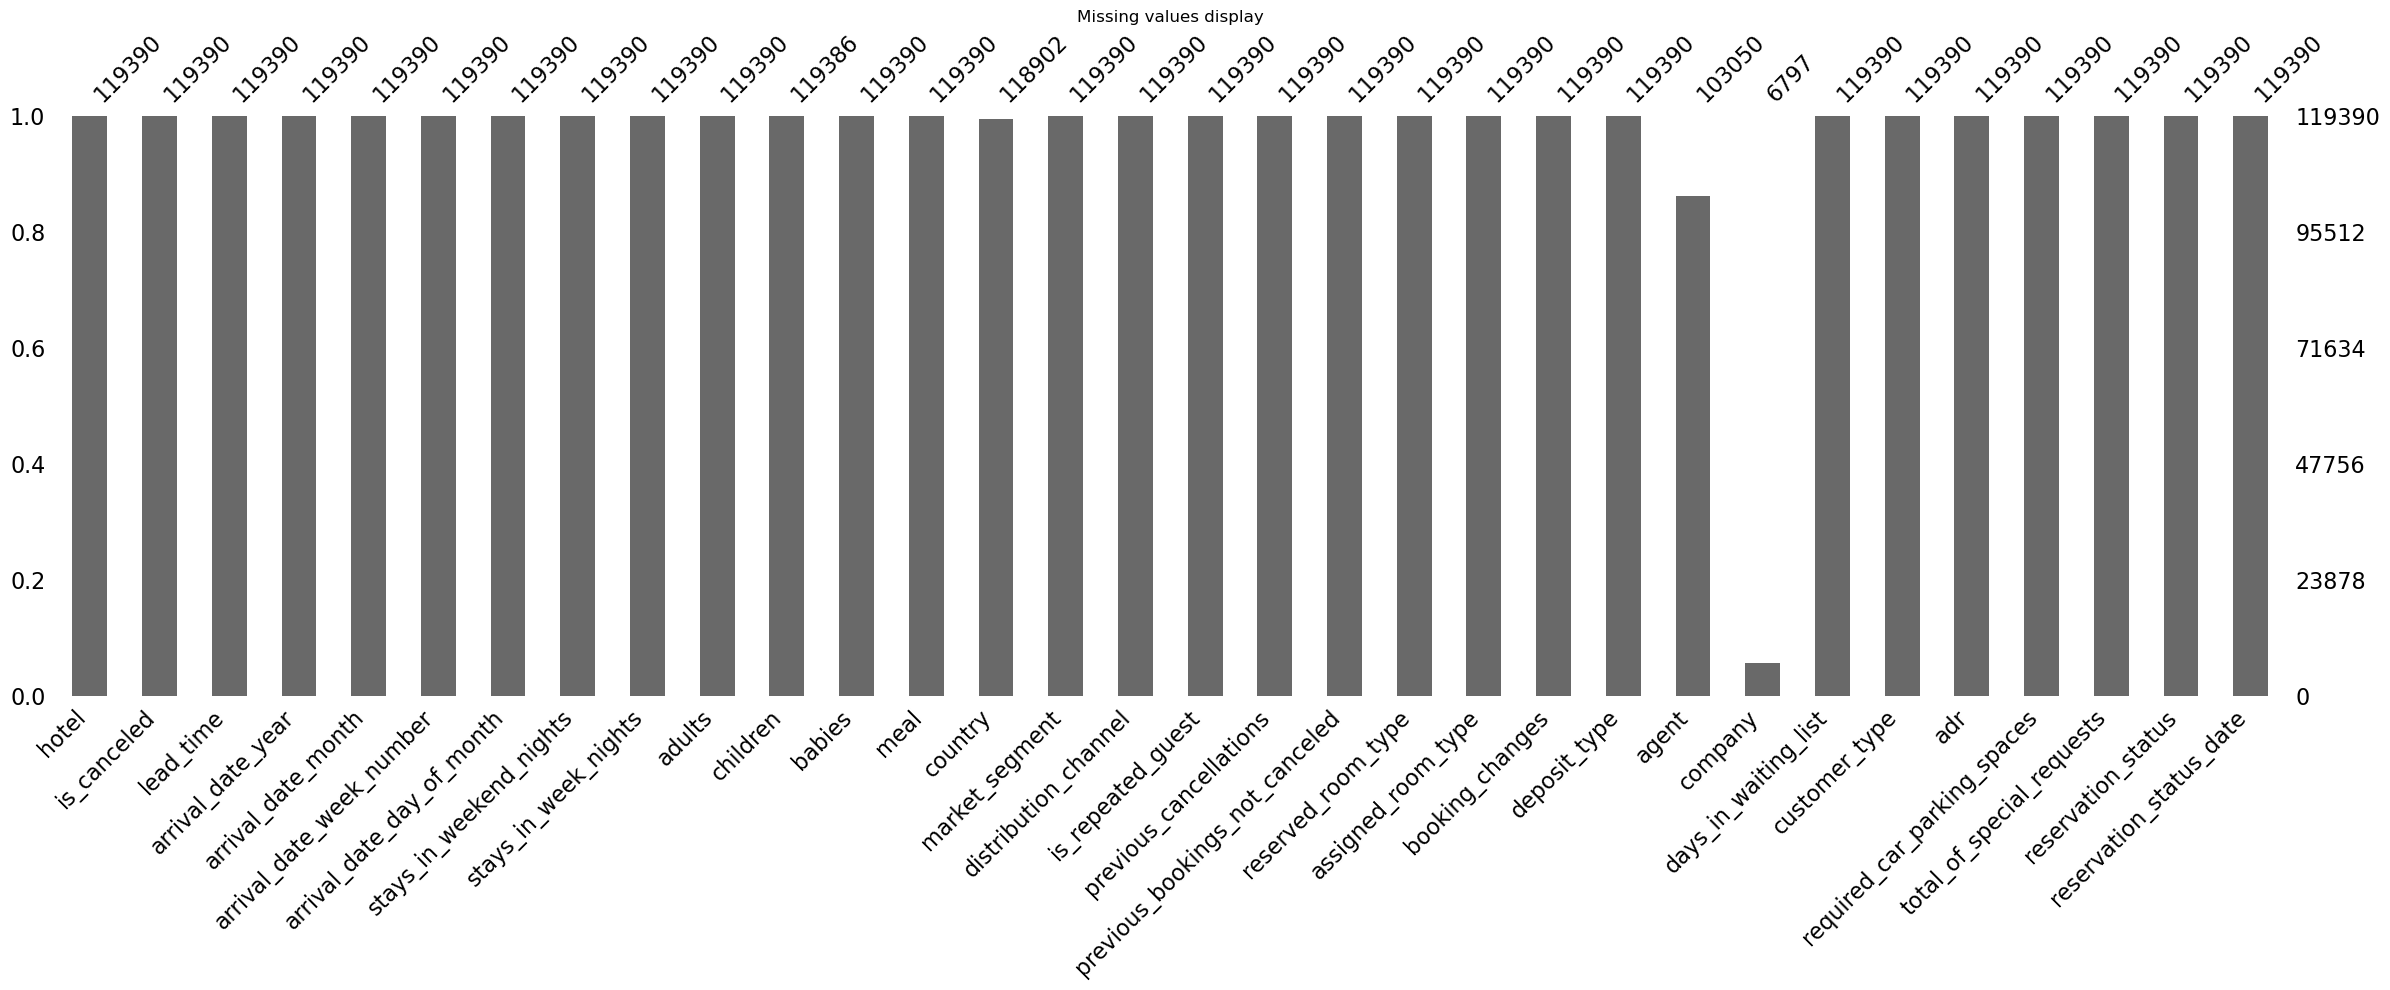

In [549]:
msno.bar(df)
plt.title('Missing values display')
plt.tight_layout()

In [550]:
#Company details have only 6 % values ,we can drop this feature
# 13% missing agent details , lets see if we can impute these details or proceed with normal processing 

In [551]:
df.drop('company',axis=1,inplace=True)

In [552]:
#dependent feature 
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

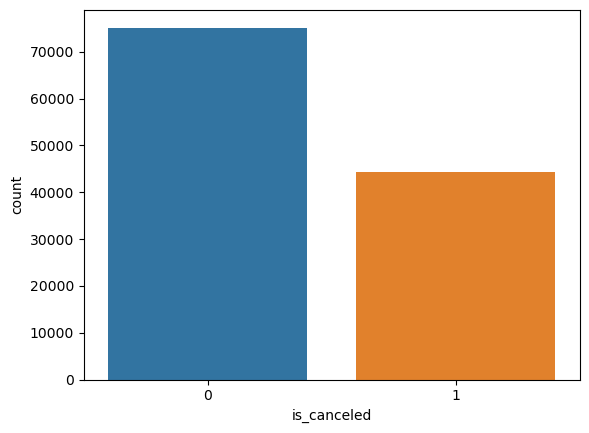

In [553]:
sns.countplot(df['is_canceled'])

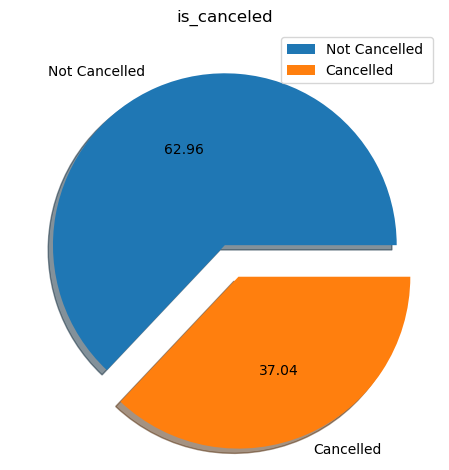

In [554]:
plt.pie(df['is_canceled'].value_counts(),autopct='%.2f',shadow=True,explode=[0,0.2],labels =['Not Cancelled ','Cancelled'])
plt.title('is_canceled')
plt.legend()
plt.tight_layout()

In [555]:
# we can see 37% of total booking done are cancelled 


# EDA

In [556]:
#Univariate Analysis
#Creating 2 new data frames for analysis purpose specific to Cat and continous featureS


In [557]:
#converting these numberical fetures as object type for better EDA
col = ['arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'total_of_special_requests']
for i in col:
    df[i] = df[i].astype('object')

In [558]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [559]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')
print(df_num.shape,df_cat.shape)

(119390, 6) (119390, 25)


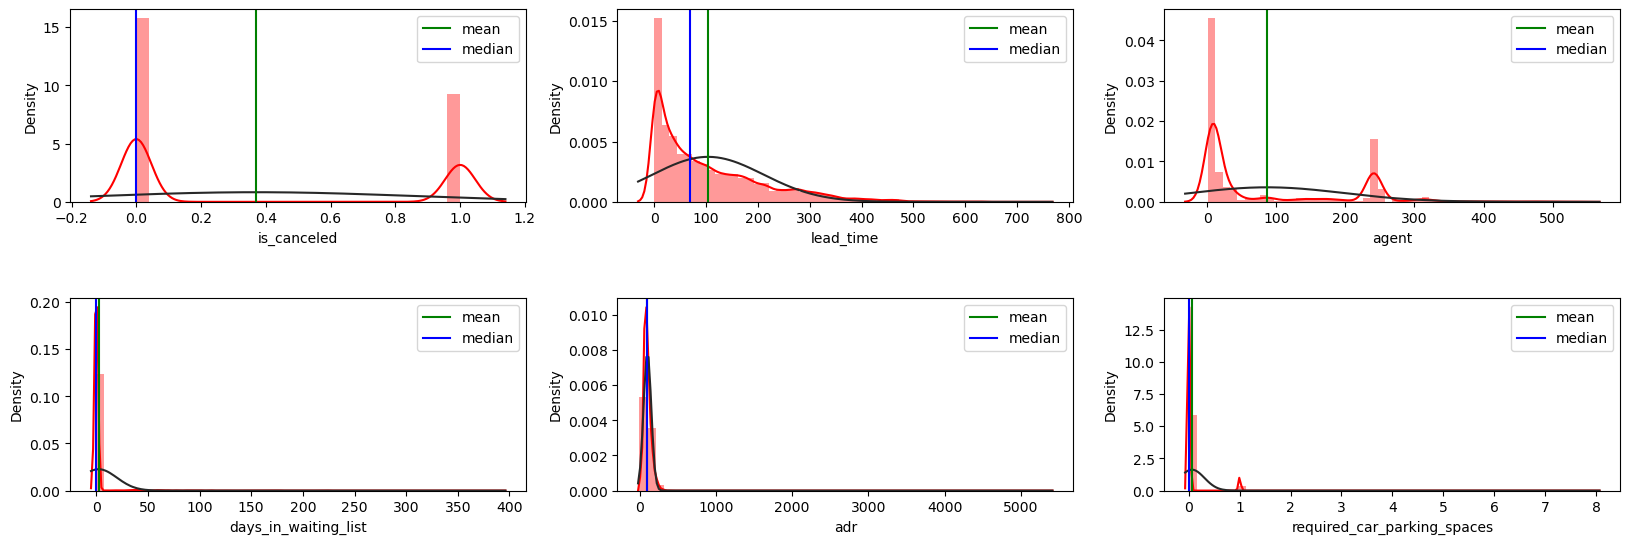

In [560]:
plt.subplots(figsize=(20,10))
col = df_num.columns
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.distplot(df_num[i], kde=True, fit=stats.norm,color='r')
    plt.axvline(df_num[i].mean(),color='g',label='mean')
    plt.axvline(np.median(df[i]),color='b',label='median')   
    plt.legend() 
#for ease of visiblity and understanding ploting first 10 continous features





In [561]:
#is_cancelled  is bimodal as we are aware it signifies cancellation or not
#very less bookings with parking request 
#avg lead time is 100
#adr is normally distributed
#Agent is also bimodal...more conentration points at couple of places 



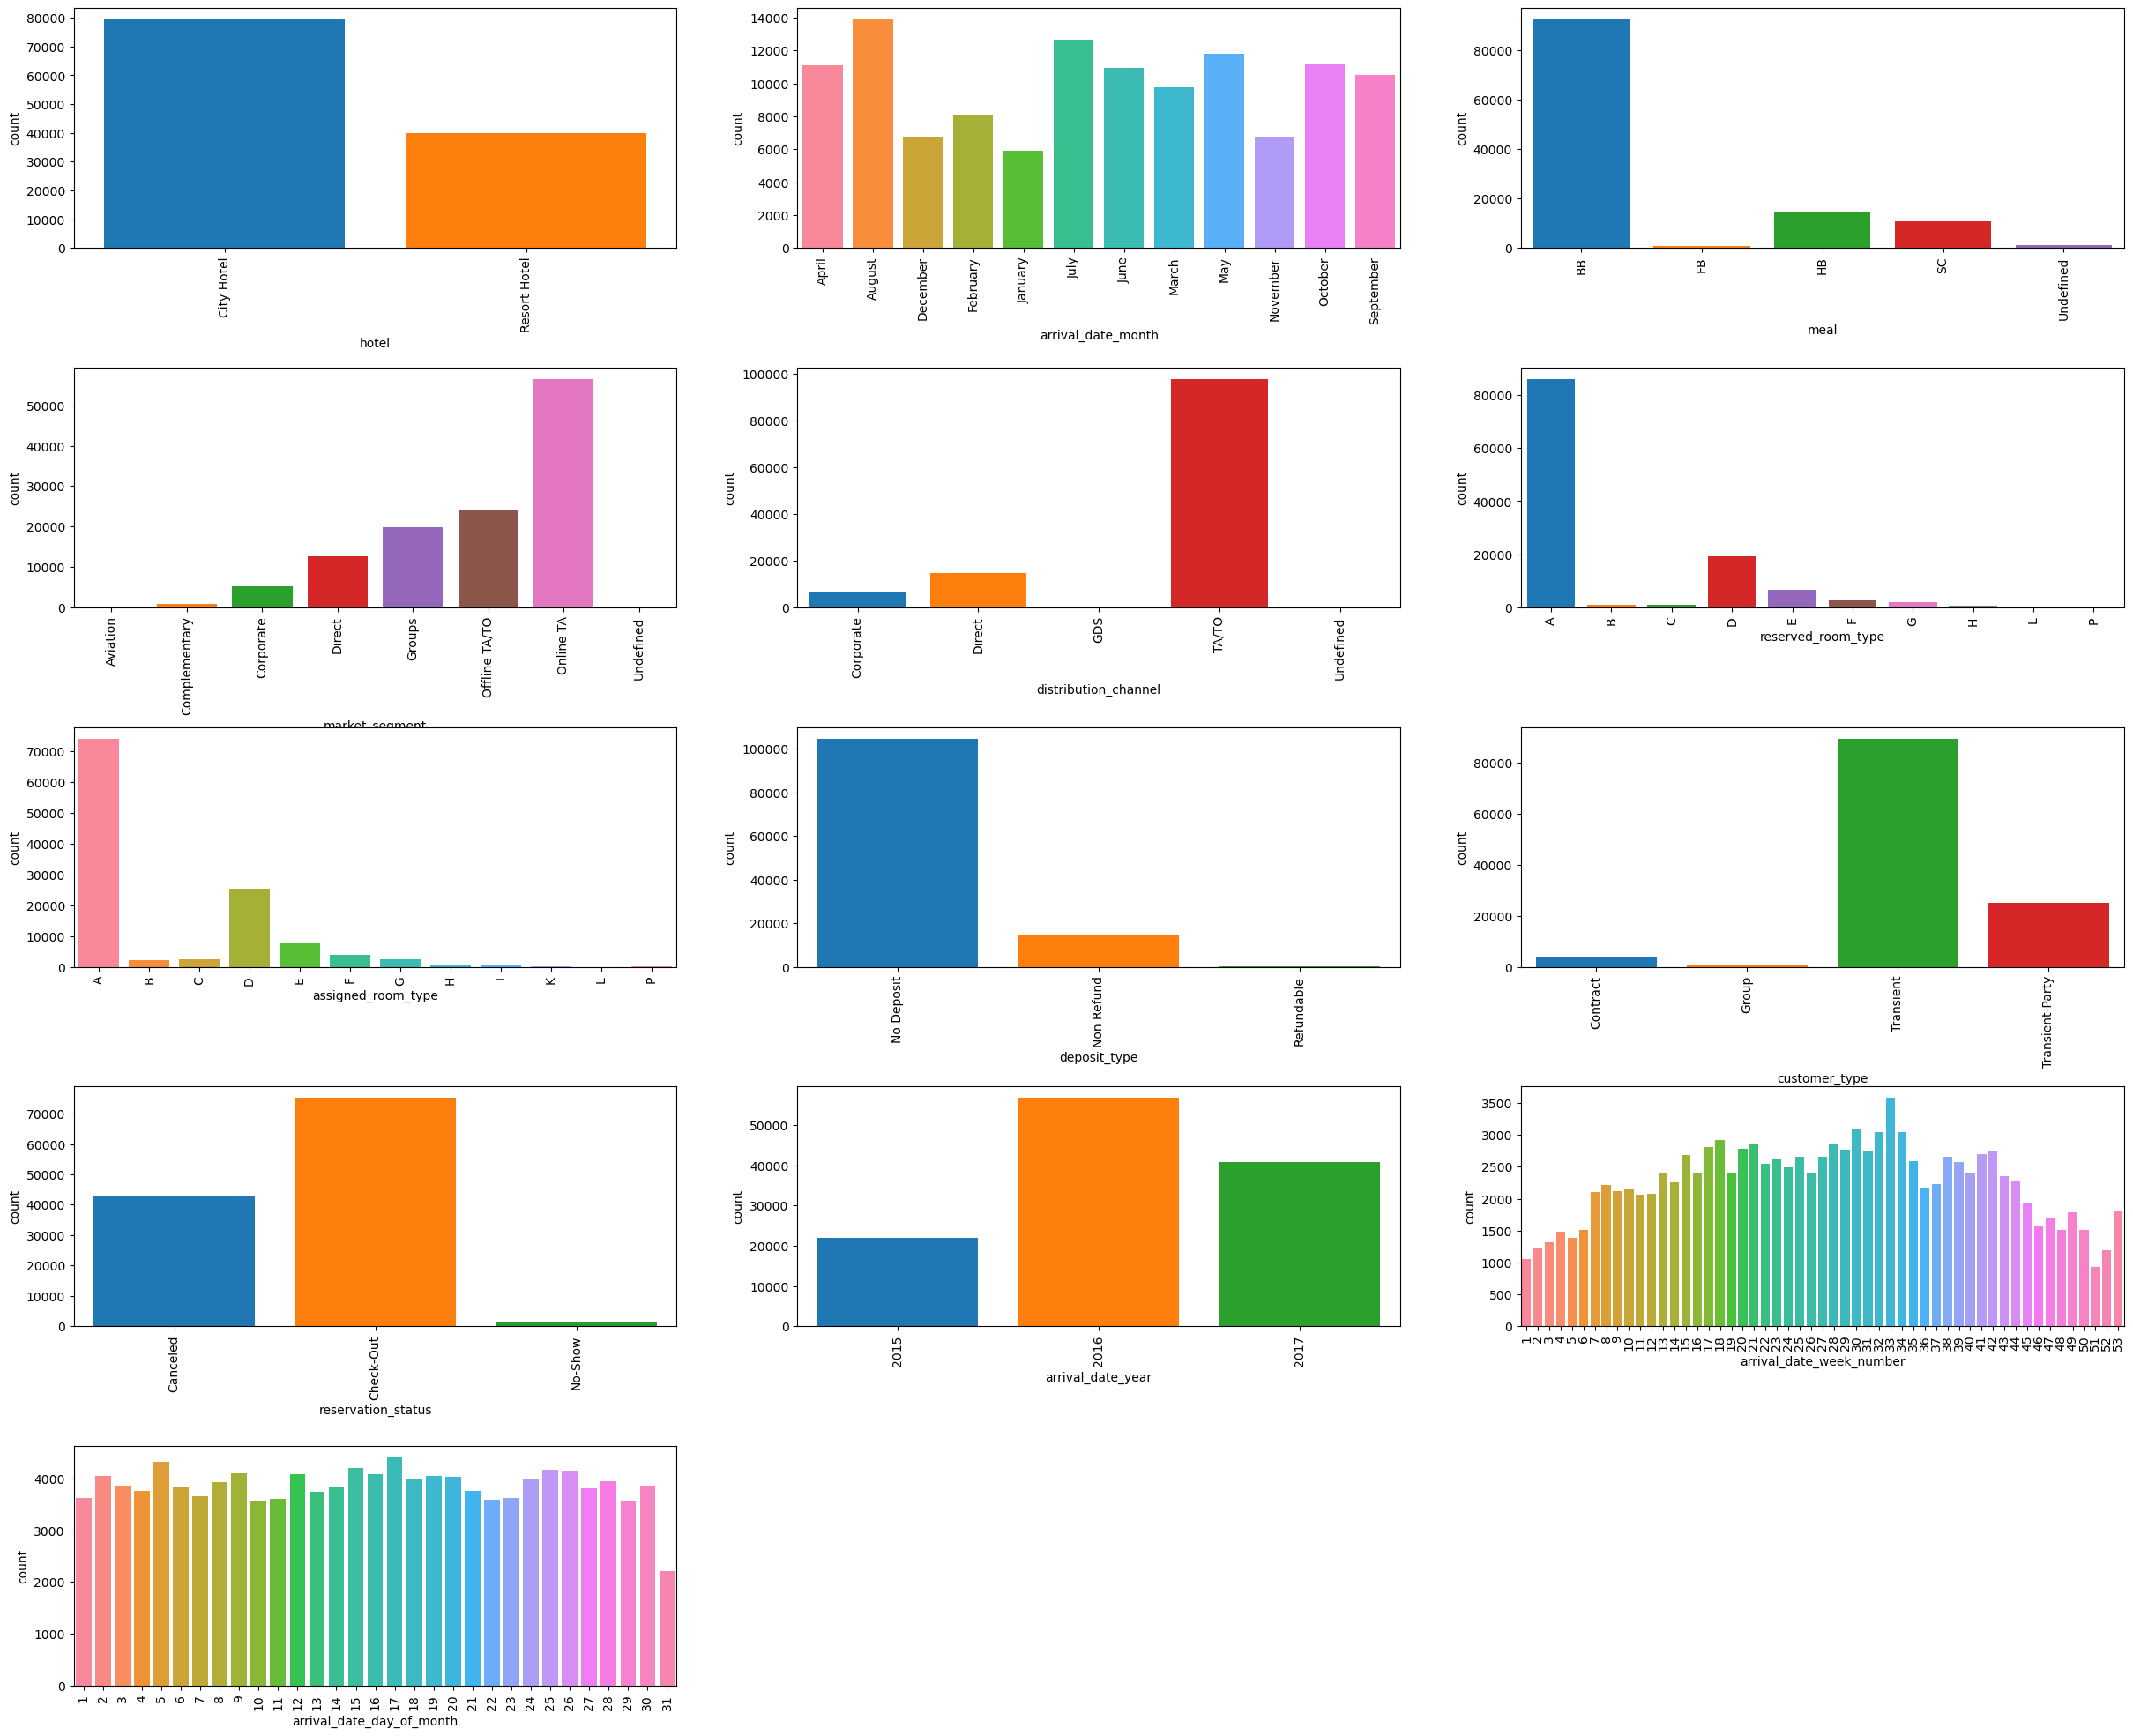

In [562]:

plt.subplots(figsize=(30,30))
col = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status','arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month'] # 'country','reservation_status_date'
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2),3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.countplot(df[i],order=sorted(df[i].unique()),saturation=1)
    plt.ticklabel_format()
    plt.xticks(rotation=90)
   


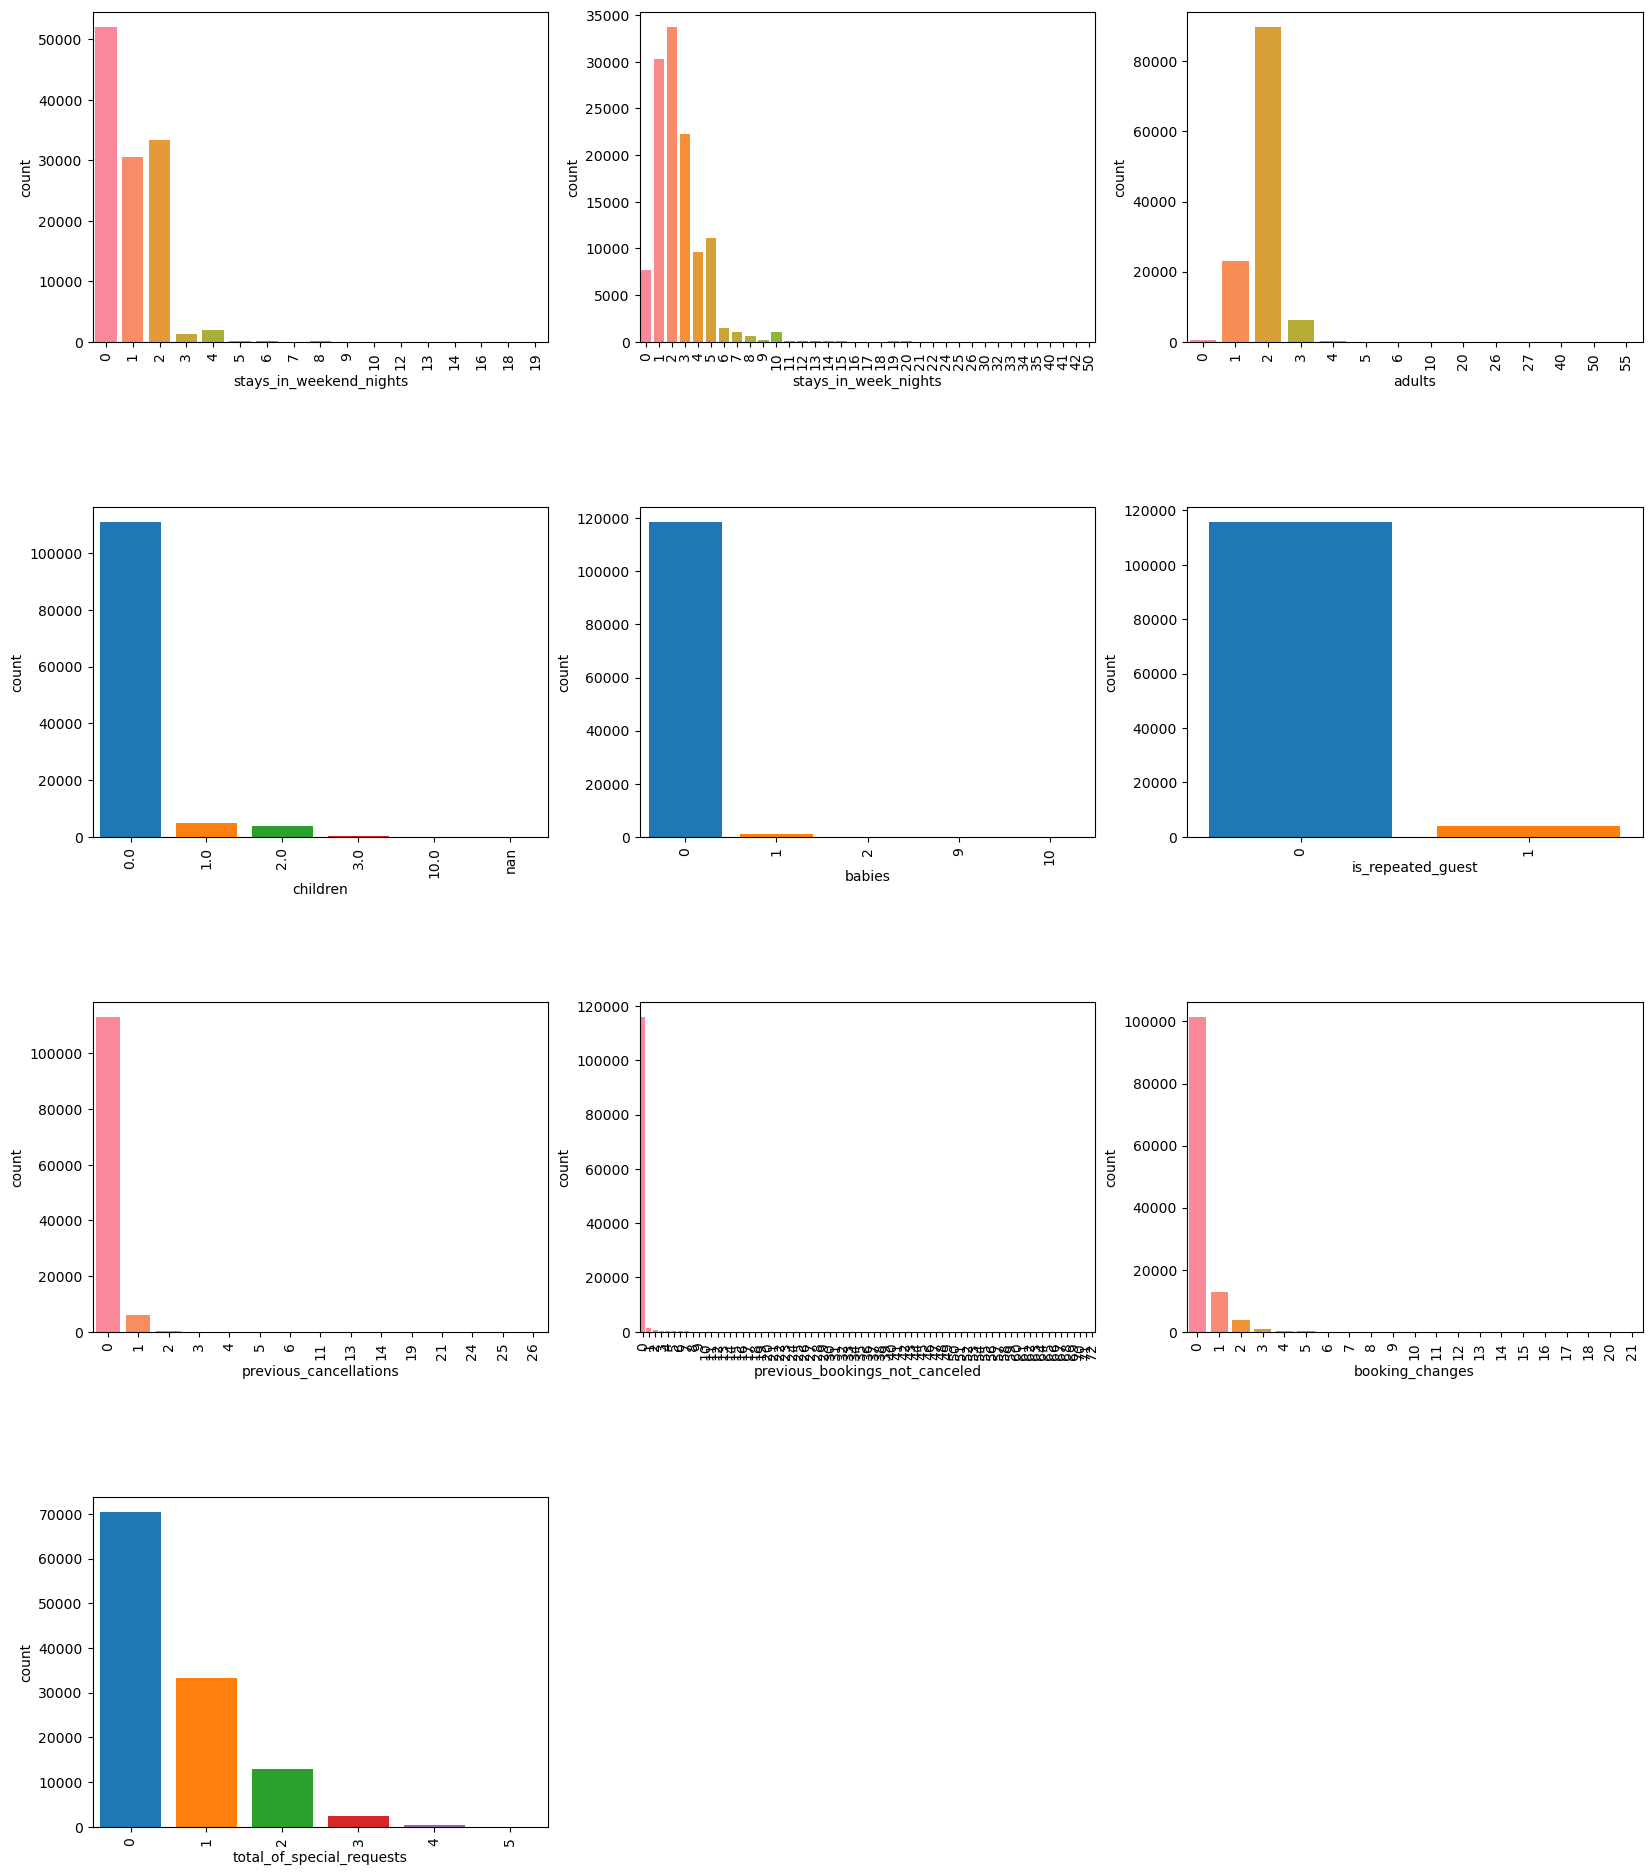

In [563]:

plt.subplots(figsize=(20,30))
col = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes','total_of_special_requests'] # 'country','reservation_status_date'
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2),3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.countplot(df[i],order=sorted(df[i].unique()),saturation=1)
    plt.ticklabel_format()
    plt.xticks(rotation=90)


In [564]:
#Hotels are more in cities compared to resorts
#aug july may are peak months for bookings and Jan is least
#BB is most prefered meal option(bread and breakfast seems to be provided as part of booking 
#Most percentage of booking as done through online Travel agents 
#again as above Online booking TA so method of  distribution is mostly done TA/TO
#Most prefered room reservation type is for A and based on avaliablty the same room type is Most likely to be alloted
#No depsoite bookings seems to be popular (seems  like online boooking doesnt need  deposit to book a room may be influencing here)
#high no of Transient cust booking the rooms
#good no of cancelled reservation status in the data
# 2016 has peak year of bookings comapritively 
# day of the month is uniform dist
#week 33 is most bookings and 51 is least
#if booking done during weekend mostly 1 or  2 nights stay are booked
# in case of week days 1-3 mostly and few extedn till 5 nights stay
# 2 adults are commonly booking for the stay and also good no of single bookings 
# most of the guests do not repeat 
#very less % of booking with children and babies
#1-2 paking spaces commonly booked if arrival on vehicles 
#very few occurances can be where booking was canclled previoulsy ,but the repeated guests are also very less so this needs to be verified 


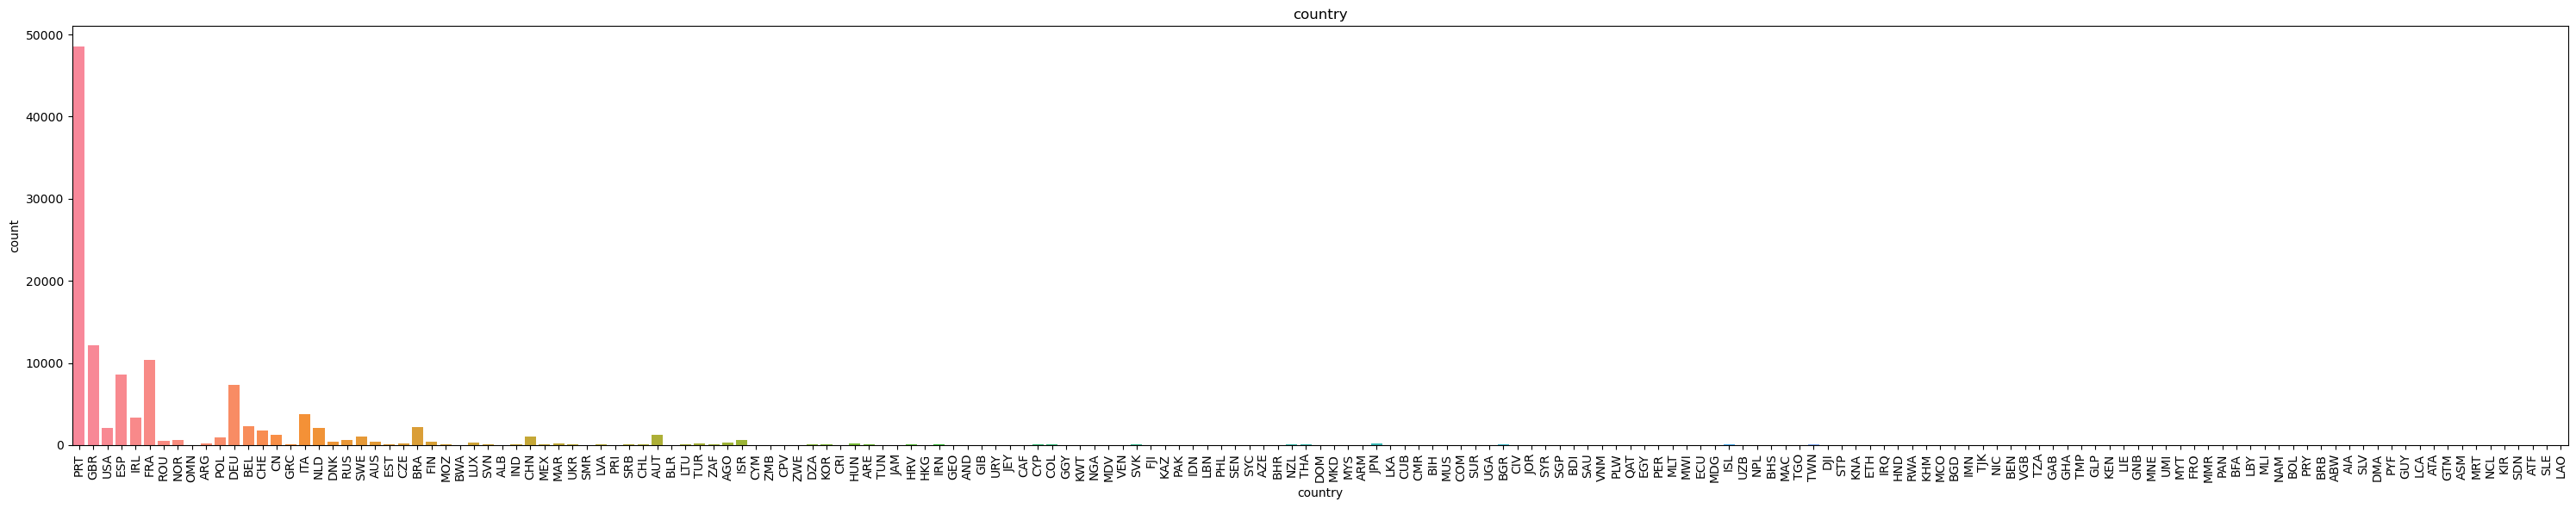

In [565]:
plt.figure(figsize=(30,6))
sns.countplot(df['country'],saturation=1)
plt.title('country')
plt.ticklabel_format()
plt.xticks(rotation=90)
plt.tight_layout()

In [566]:
country_per = df['country'].value_counts(normalize=True)*100
country_per.head()

PRT    40.865587
GBR    10.200838
FRA     8.759314
ESP     7.205934
DEU     6.128576
Name: country, dtype: float64

In [567]:
#We can see from data that most of the booking 40% is from protugal
# 10% from great britian followed by 9% france 
#So major part of booking from Europe

In [568]:
df['reservation_status_date'].value_counts().head()


2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
Name: reservation_status_date, dtype: int64

In [569]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']).dt.strftime('%Y-%m-%d')
df['month_yr'] = df['reservation_status_date'].apply(lambda s: str(s)[:7])
df['Month'] = df['reservation_status_date'].apply(lambda s: str(s)[5:7])
df['Month'] = df['Month'].astype('int64')


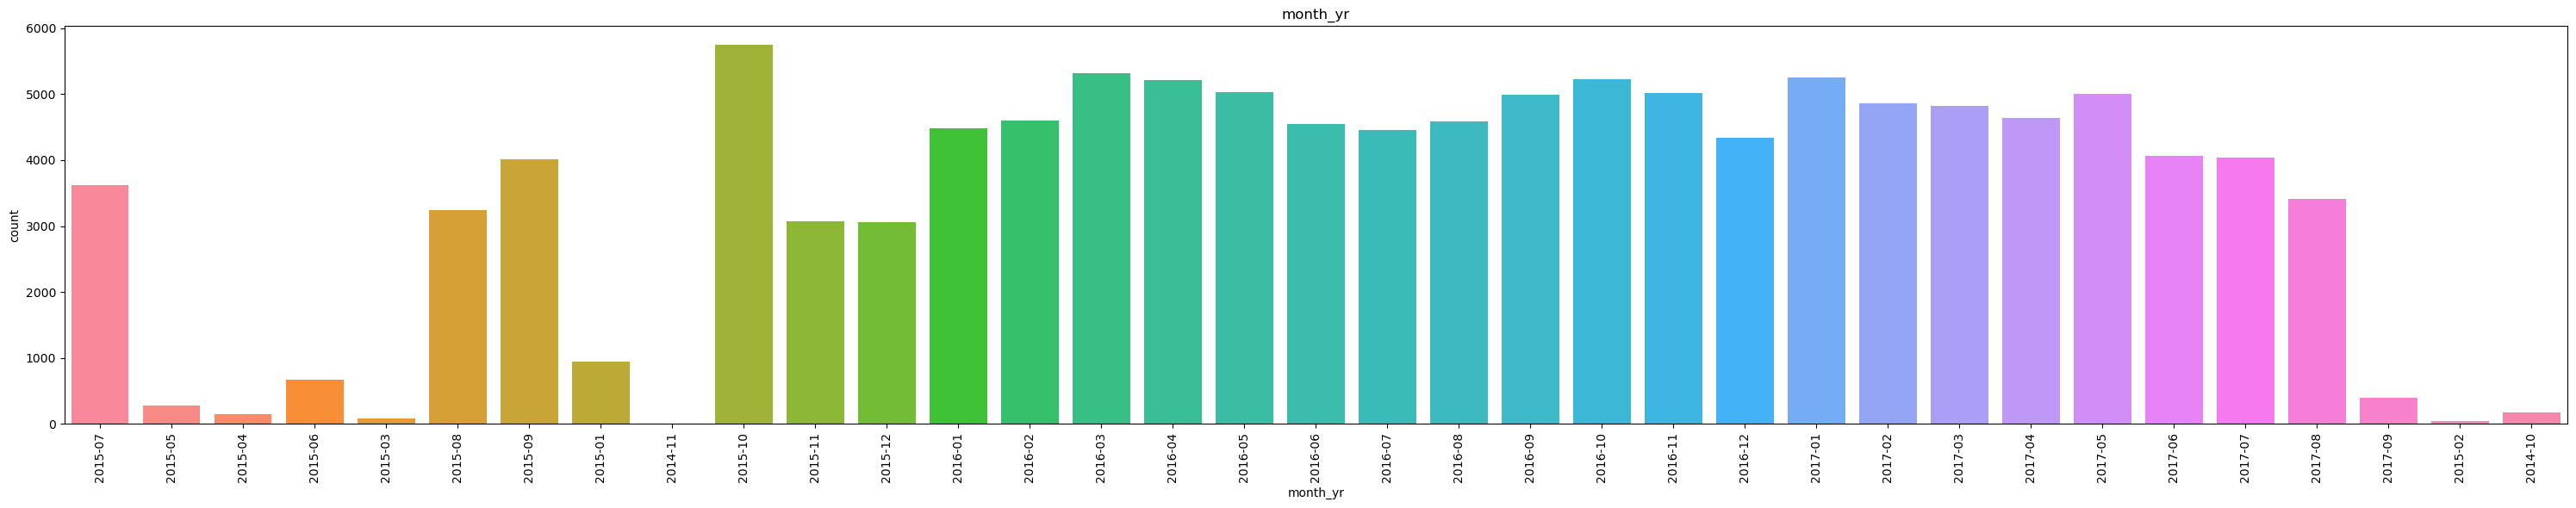

In [570]:
plt.figure(figsize=(30,6))
sns.countplot(df['month_yr'],saturation=1)
plt.title('month_yr')
plt.ticklabel_format()
plt.xticks(rotation=90)
plt.tight_layout()

In [571]:
#we can see some good booking months during the  year and not so good ones 

In [572]:
#lets cat by seasons

df['season'] = np.nan
lst=[df]
# The conditions for determining each of the seasons.
for column in lst:
    column.loc[(column["Month"] >= 3) & (column["Month"] <= 5), 'season'] = 'spring'
    column.loc[(column["Month"] >= 6) & (column["Month"] <= 8), 'season'] = 'summer'
    column.loc[(column["Month"] >= 9) & (column["Month"] <= 11), 'season'] = 'fall'
    column.loc[column["Month"] <= 2, 'season'] = 'winter'
    column.loc[column["Month"] == 12, 'season'] = 'winter'
    
df['season'].value_counts()


summer    32633
spring    30533
fall      28645
winter    27579
Name: season, dtype: int64

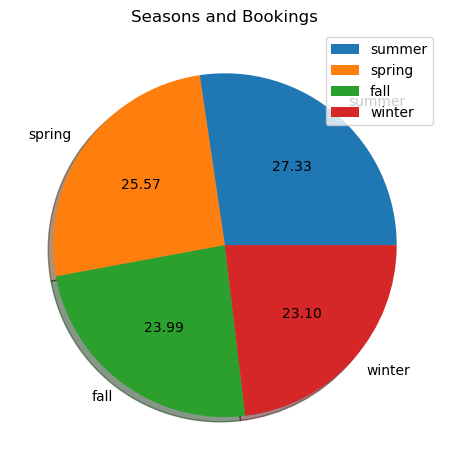

In [573]:
plt.pie(df['season'].value_counts().values,autopct='%.2f',shadow=True,labels =df['season'].value_counts().index)
plt.title('Seasons and Bookings')
plt.legend()
plt.tight_layout()

In [574]:
#No particular booking trend using seasons


In [575]:
#Bivariate analysis

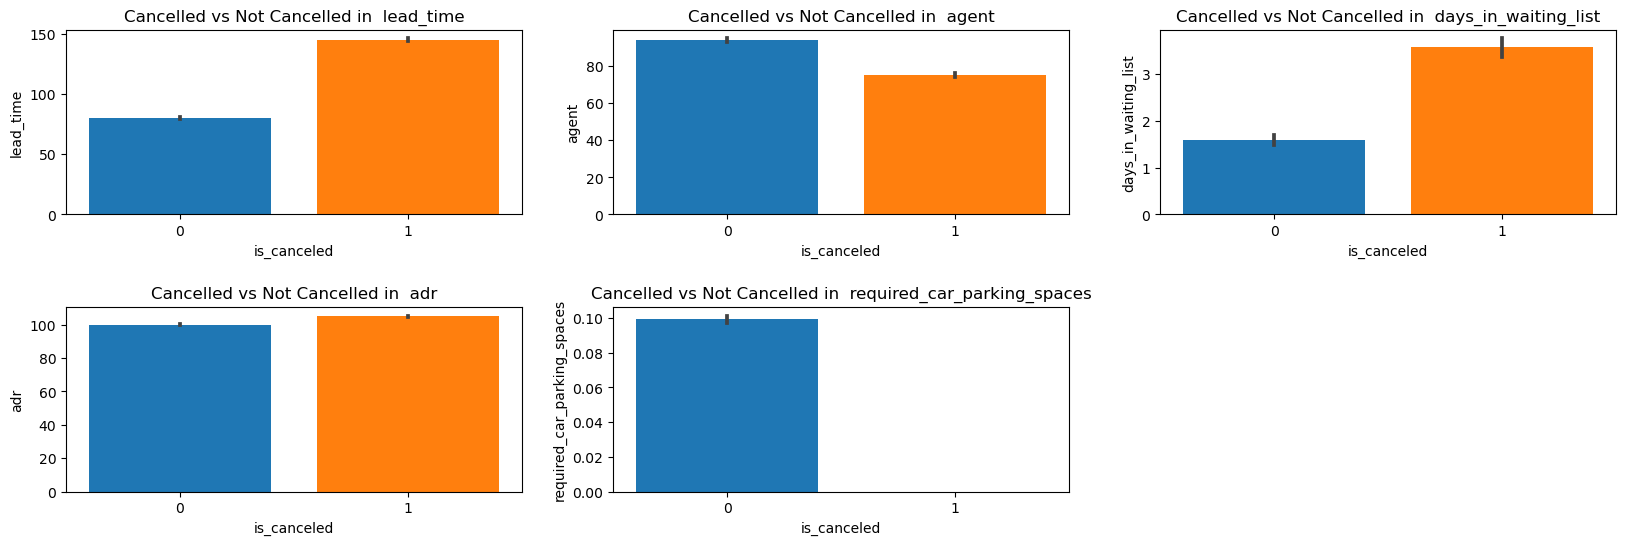

In [576]:
plt.subplots(figsize=(20,6))
col = df_num.iloc[:,1:].columns
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2), 3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.barplot(y=df[i],x=df['is_canceled'],saturation=1)  
    plt.title('Cancelled vs Not Cancelled in '+' '+i)
    


In [577]:
# features like lead time ,waiting list ,booking changes which are speific to booking traffic
# show good seprability with cancellation
 

In [578]:
#car parking spaces shows no variance with target feature ,lets confirm this 

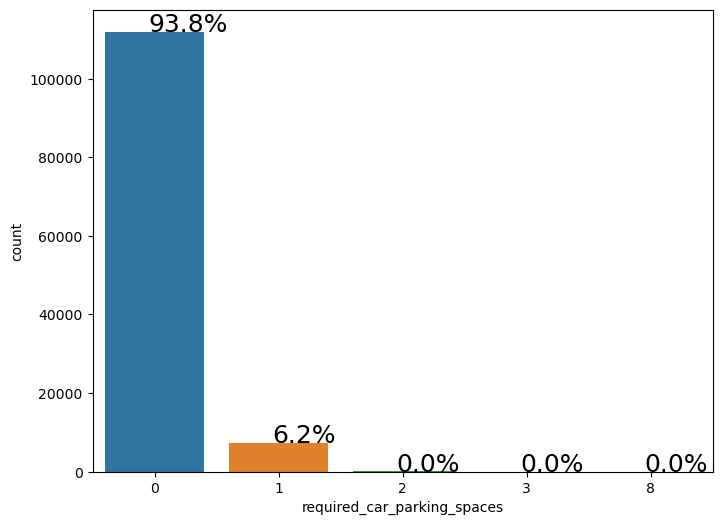

In [579]:
def plt_percente(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 18)
    plt.show()
plt.subplots(figsize=(8,6))
ax = sns.countplot(data=df, x='required_car_parking_spaces')

plt_percente(ax, df['required_car_parking_spaces'])
# we can see that booking done with  atleast 1 car parking space  request are only 6% and have never canceled the booking

In [580]:
df.drop('required_car_parking_spaces',axis=1,inplace=True)

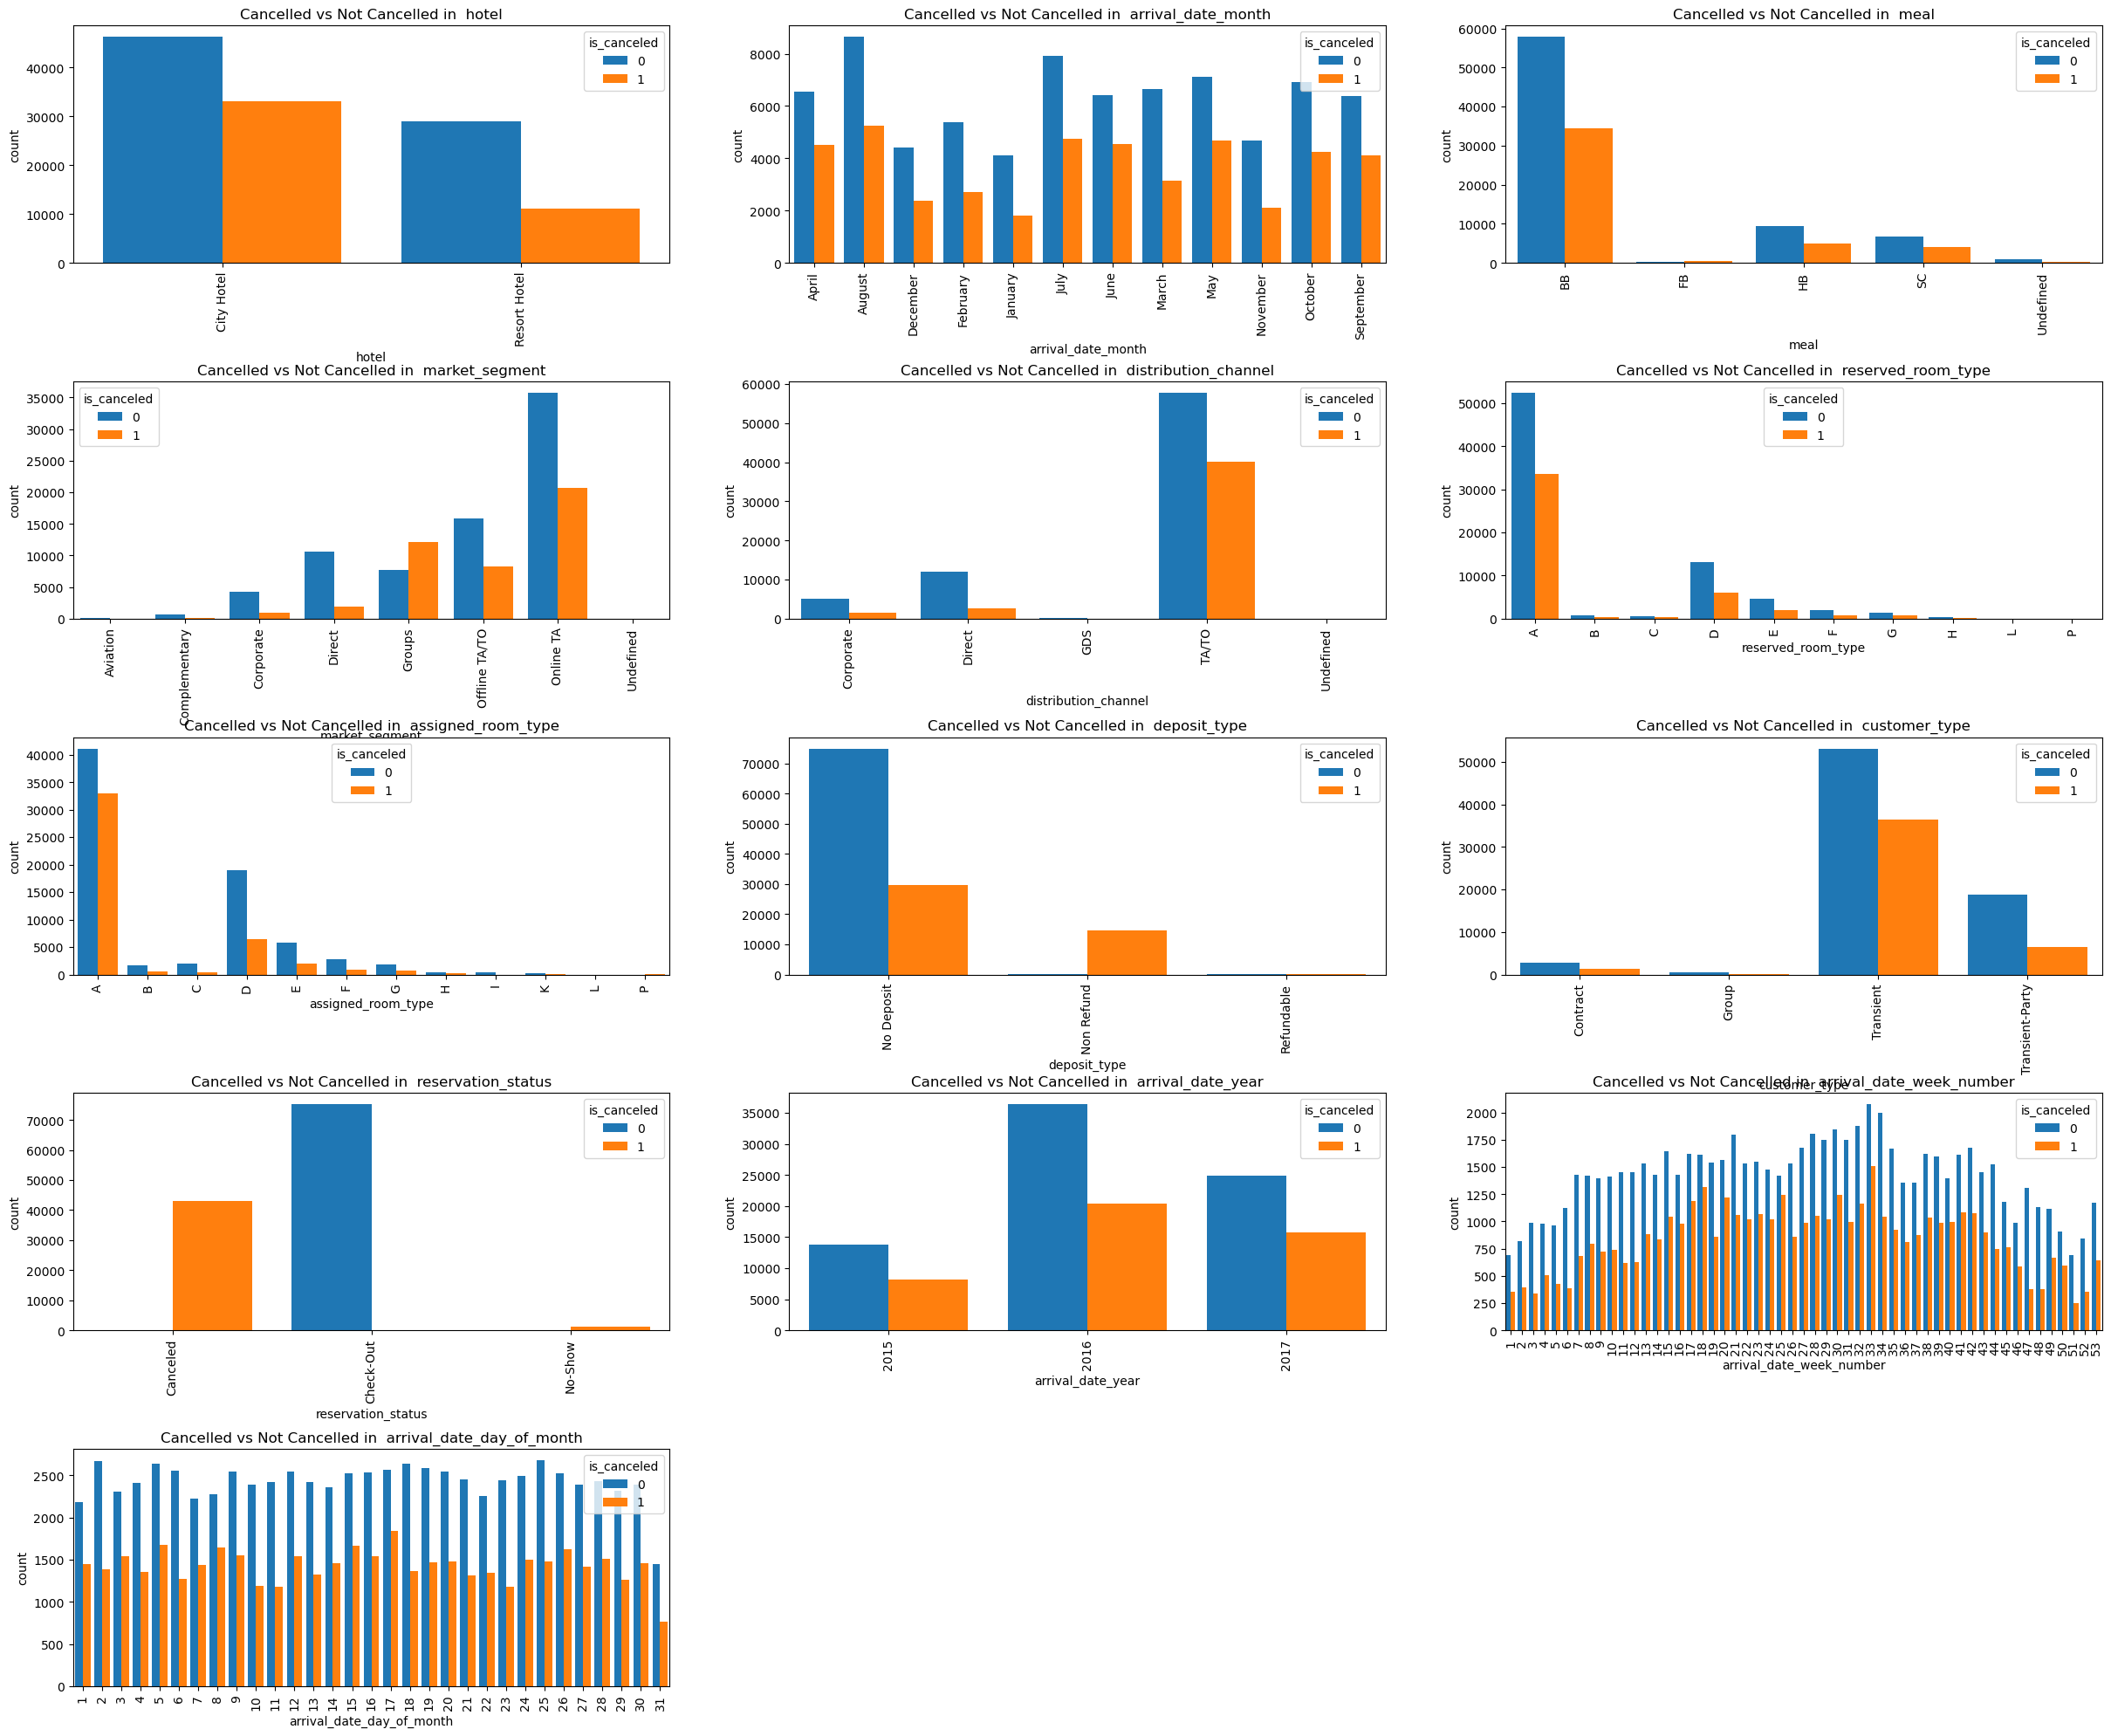

In [581]:
plt.subplots(figsize=(30,30))
col =['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status','arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month'] # 'country','reservation_status_date'
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2),3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.countplot(df_cat[i],hue=df['is_canceled'],order=sorted(df[i].unique()),saturation=1)
    plt.title('Cancelled vs Not Cancelled in '+' '+i)
    plt.ticklabel_format()
    plt.xticks(rotation=90)
# variablity in each cat feature based on Cancelled or not Cancelled


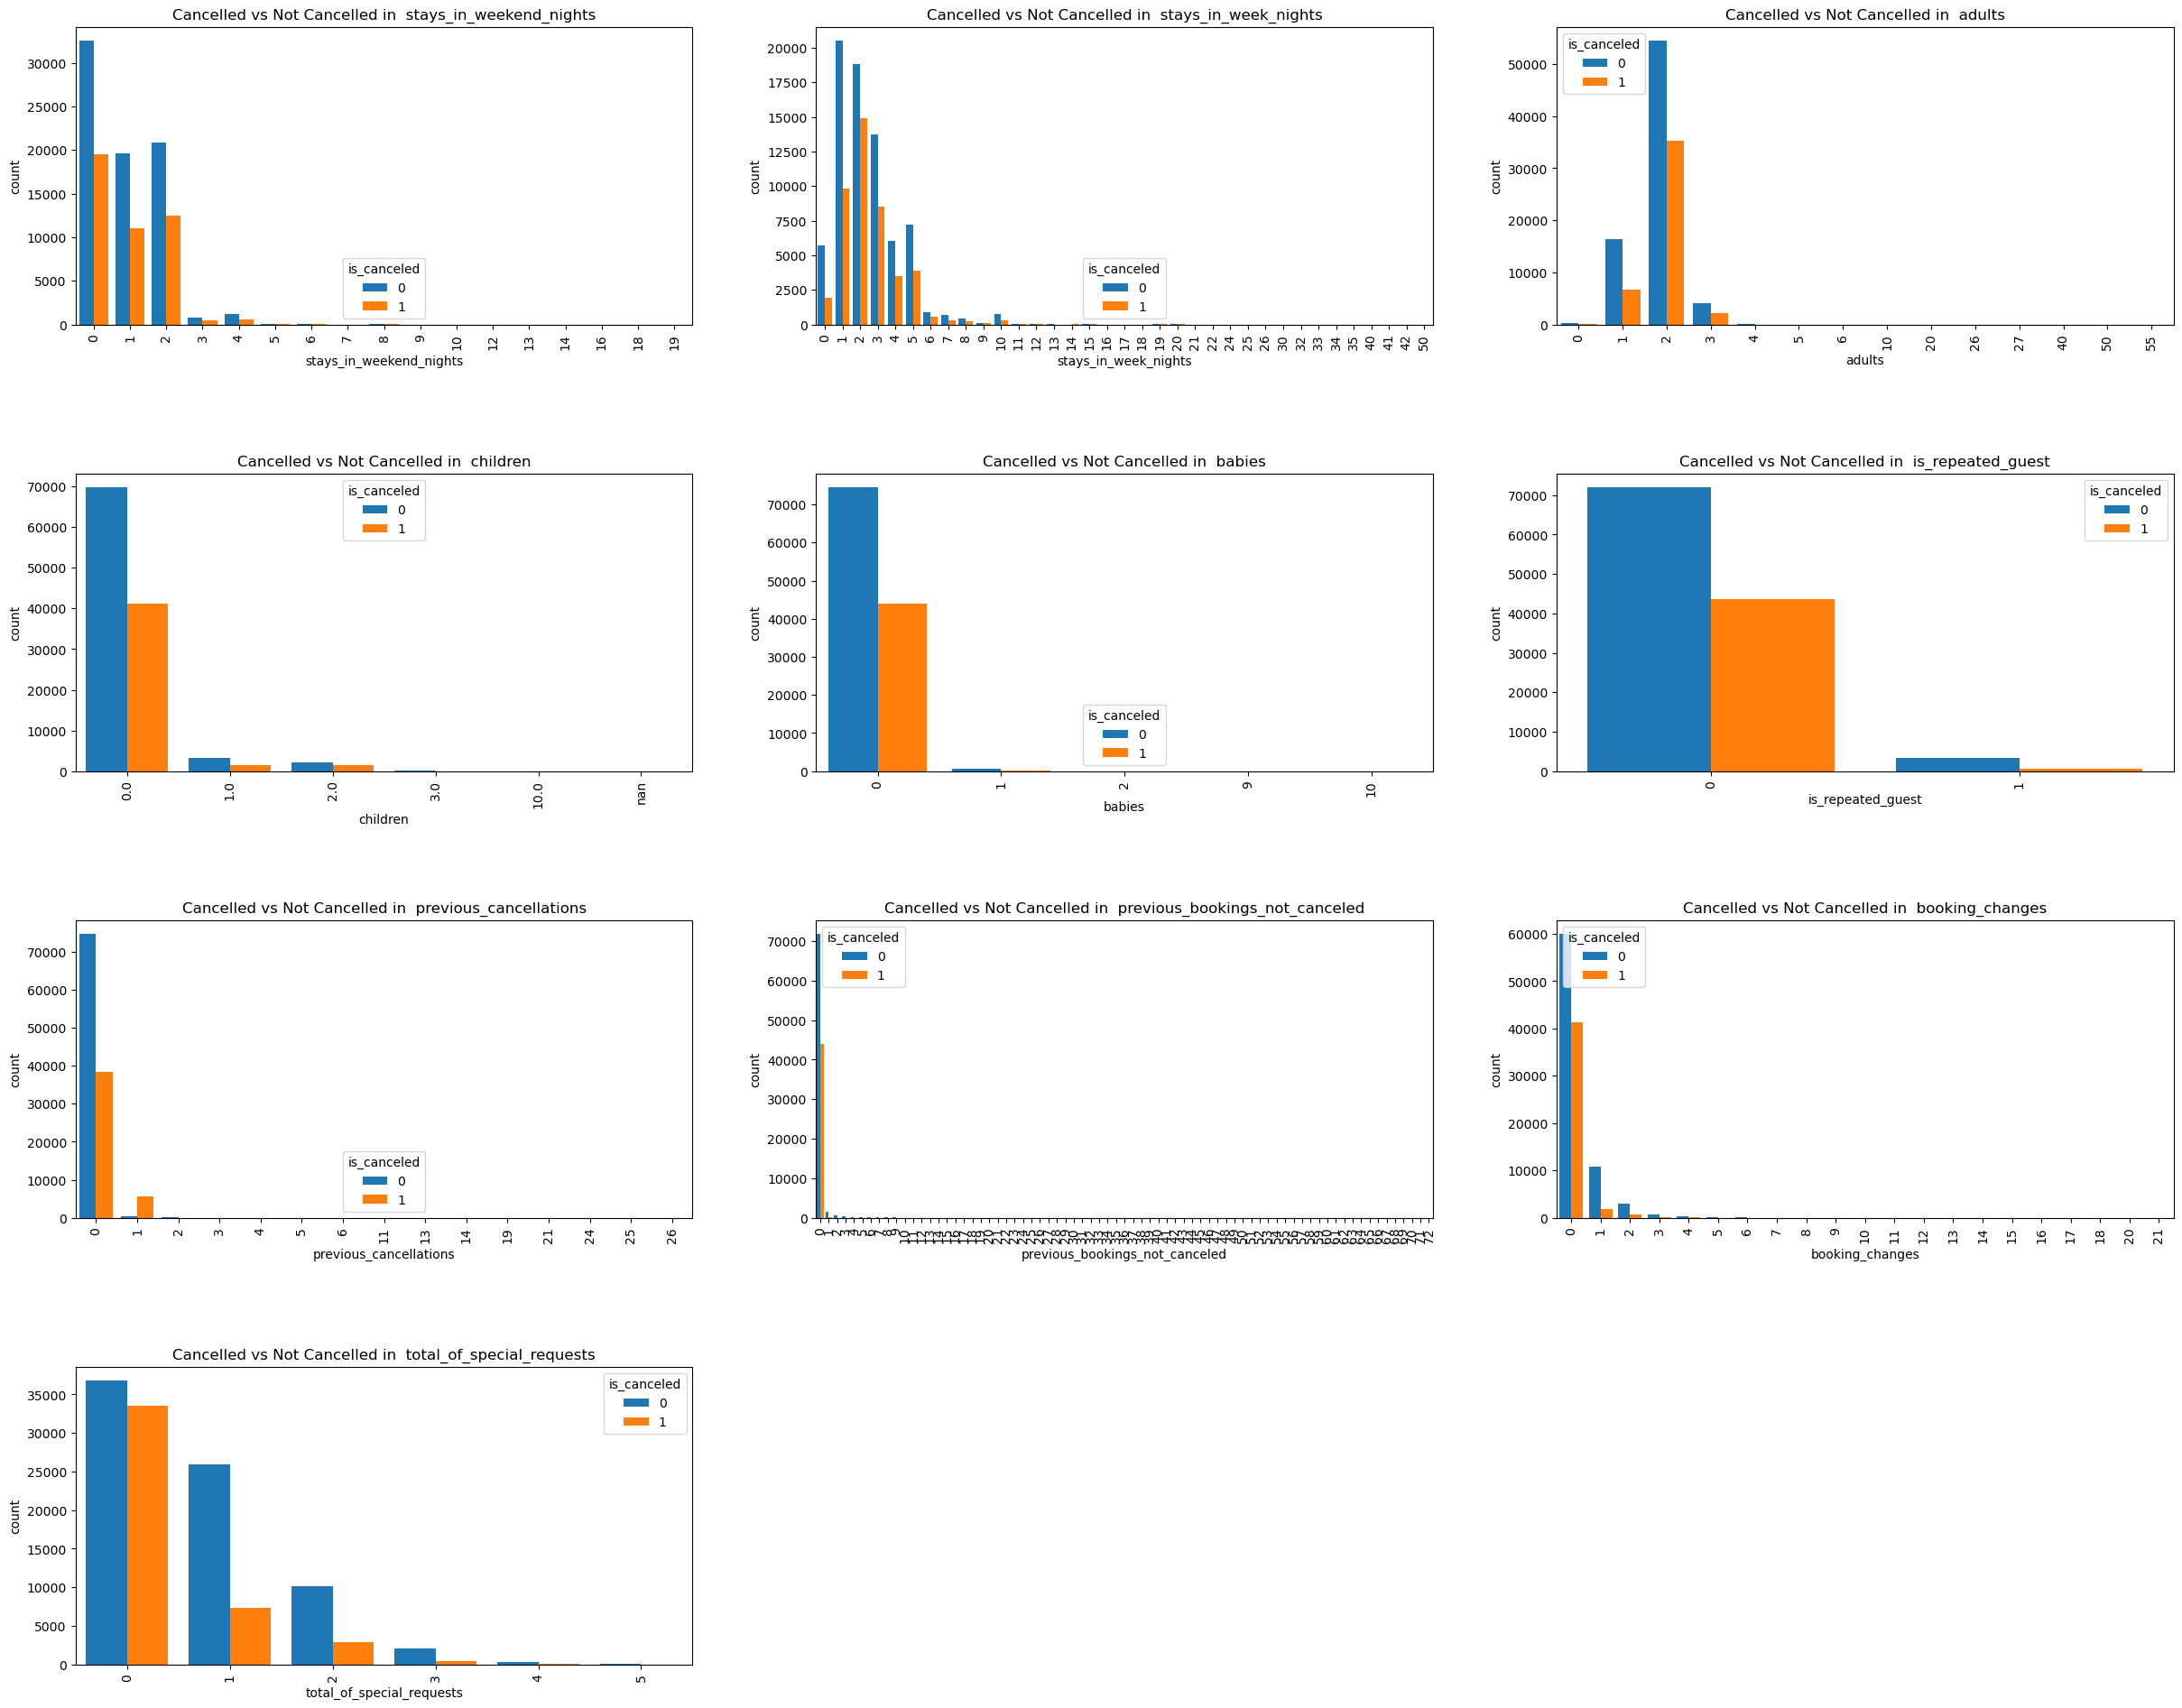

In [582]:
col =['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes','total_of_special_requests']
plt.subplots(figsize=(30,30))
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2),3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.countplot(df_cat[i],hue=df['is_canceled'],order=sorted(df[i].unique()),saturation=1)
    plt.title('Cancelled vs Not Cancelled in '+' '+i)
    plt.ticklabel_format()
    plt.xticks(rotation=90)
#cancillations more in week nights booking comprared to weekend nights
#Gropus cat in market segment feature can be good predictor for cancellation
#feature like custoemrs having special requests and booking with babies 
# and previous cancellation history show good seprablity



In [583]:
#reservation_status is straight forward and cannot be useful in predicting the booking cancellation
#lets drop
df.drop('reservation_status',axis=1,inplace=True)

# Based on ablove plots i have done some conversions in below features with the low contirbuting groups among the fetaure

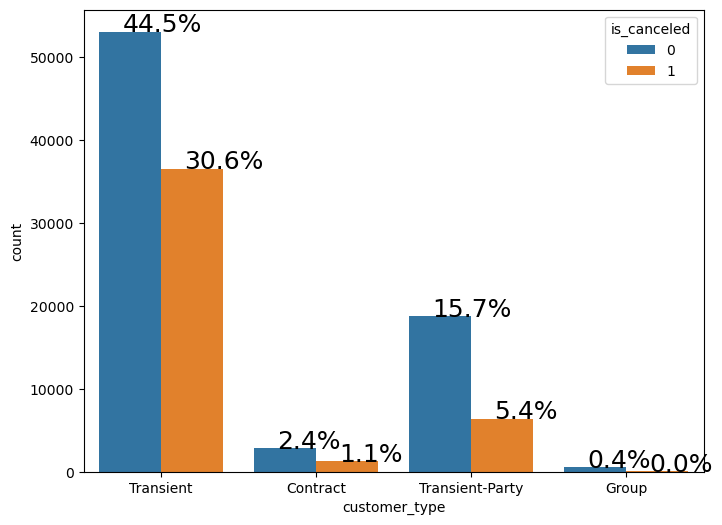

In [584]:
#customer_type
def plt_percente(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 18)
    plt.show()
plt.subplots(figsize=(8,6))
ax = sns.countplot(data=df, x='customer_type',hue='is_canceled')

plt_percente(ax, df['customer_type'])
# in group and contract types are  low % of values(0.4 and 3.5%) and no variablity for group type 
#but 1 % cancllation can be seen in contract 
#as the data in these cat are very less ,lets merge these into transient-party cat



In [585]:
df['customer_type'].replace({'Contract':'Transient-Party','Group':'Transient-Party'},inplace=True)

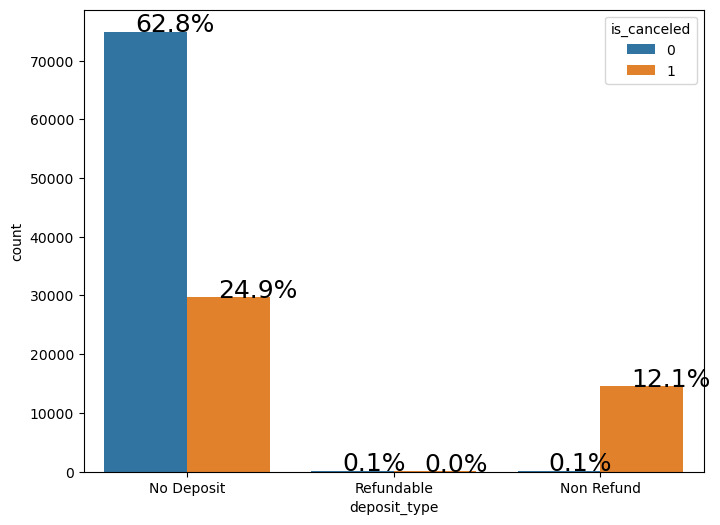

In [586]:
#deposit type

def plt_percente(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 18)
    plt.show()
plt.subplots(figsize=(8,6))
ax = sns.countplot(data=df, x='deposit_type',hue='is_canceled')

plt_percente(ax, df['deposit_type'])
# refundable deposit type 0.1% and never cancelled .
#lets merge this into no deposit type (0.1% should be fine)


In [587]:
df.replace({'Refundable':'No Deposit'},inplace=True)


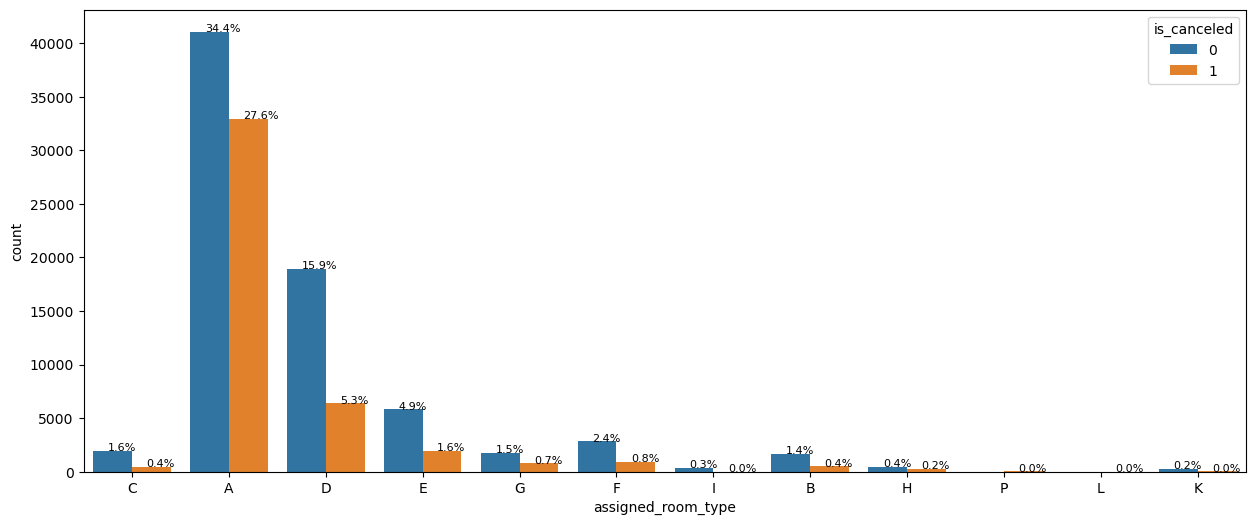

In [588]:
#assigned room type
def plt_percente(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 8)
    plt.show()
plt.subplots(figsize=(15,6))
ax = sns.countplot(data=df, x='assigned_room_type',hue='is_canceled')

plt_percente(ax, df['assigned_room_type'])
# assigned room type A D and E are major contributer ,but lets check this works same with reserved room type 

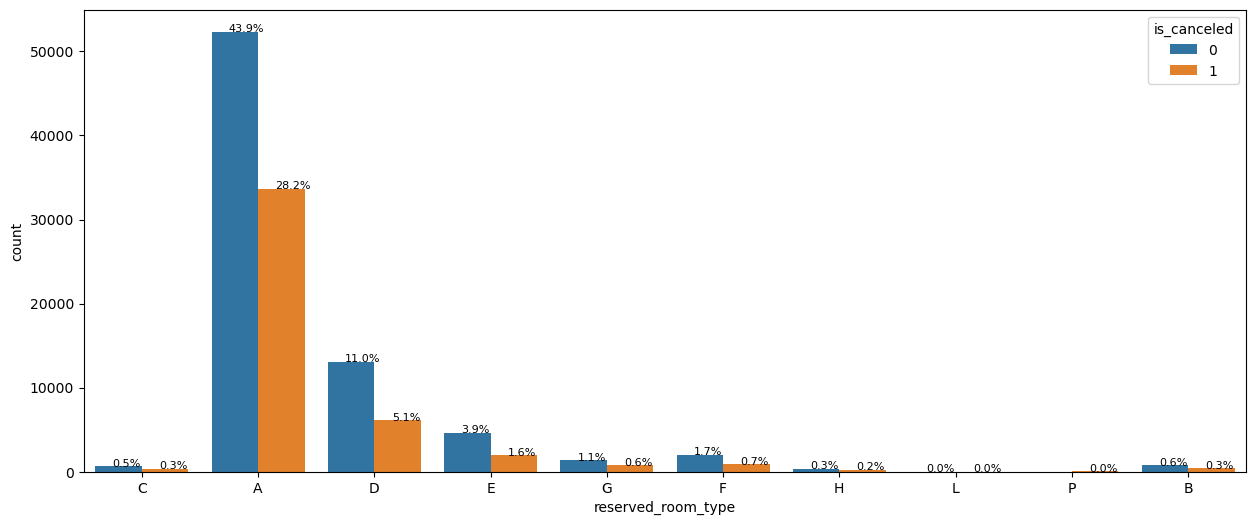

In [589]:
#reserved room type 
def plt_percente(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 8)
    plt.show()
plt.subplots(figsize=(15,6))
ax = sns.countplot(data=df, x='reserved_room_type',hue='is_canceled')

plt_percente(ax, df['reserved_room_type'])


In [590]:
# the major contributer are similar 
# lets keep the 3 major cotributers and convert all other room types as OTHER roomtype (<5% room types basically)
#df.loc[(df['reserved_room_type'] not in ['A','D','E']) , 'reserved_room_type'] = 'other'
def Impute(x):
    room_type = x
    if room_type not in ['A','D','E'] :
        return 'other'
    else:
        return room_type

# ROOM TYPE Impute
df['reserved_room_type'] = df['reserved_room_type'].apply(lambda x:Impute(x))
df['assigned_room_type'] = df['assigned_room_type'].apply(lambda x:Impute(x))

In [591]:
col = ['meal', 'market_segment','distribution_channel']
#Similarly in feature 'meal', 'market_segment','distribution_channel' the minority group types were 1.6%.0.8%,0.8% 
#we have added them into majority contributing group respectively

In [592]:
def Impute(x):
    channel = x
    if channel  in ['Undefined','FB'] :
        return 'BB'
    else:
        return channel

# ROOM TYPE Impute
df['meal'] = df['meal'].apply(lambda x:Impute(x))


In [593]:
def Impute(x):
    channel = x
    if channel  in ['Undefined','Aviation','Complementary'] :
        return 'Online TA'
    else:
        return channel

# ROOM TYPE Impute
df['market_segment'] = df['market_segment'].apply(lambda x:Impute(x))


In [594]:
def Impute(x):
    channel = x
    if channel  in ['Undefined','GDS'] :
        return 'TA/TO'
    else:
        return channel

# ROOM TYPE Impute
df['distribution_channel'] = df['distribution_channel'].apply(lambda x:Impute(x))


In [595]:
#children ,babies,occurances are very low and mostly have 0 so lets covert them 

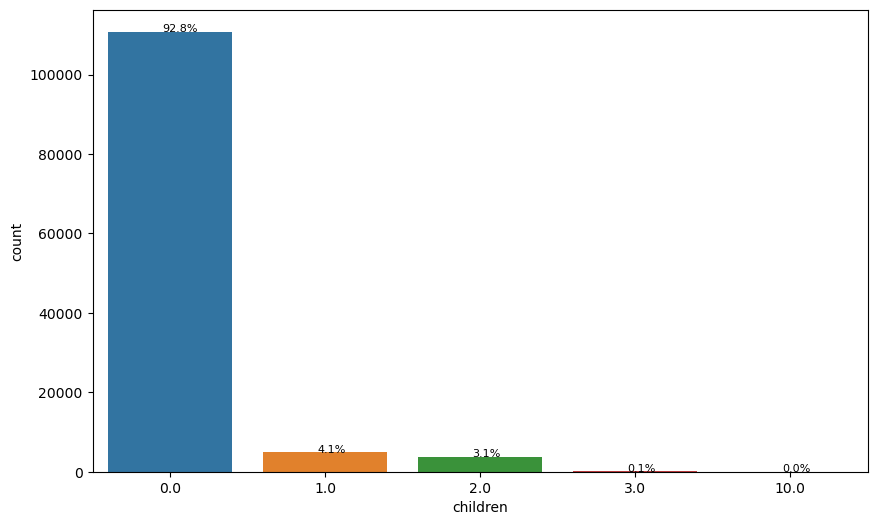

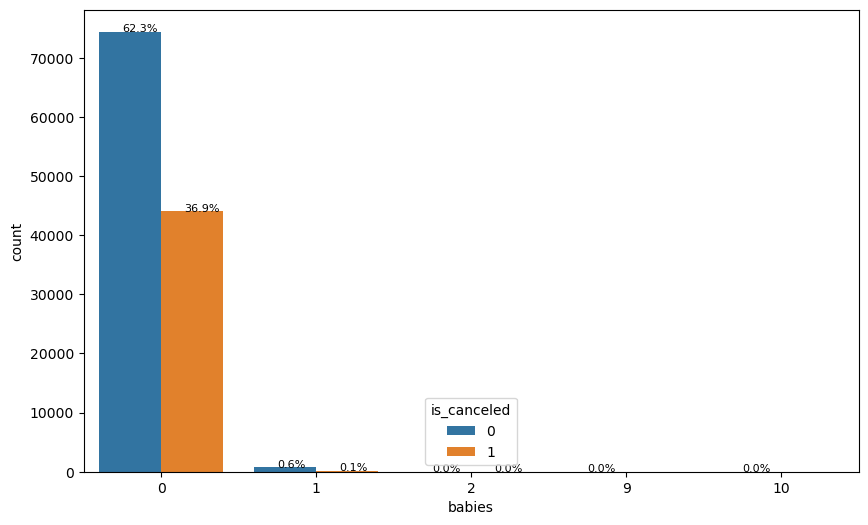

In [596]:
#reserved room type 
def plt_percente(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 8)
    plt.show()
plt.subplots(figsize=(10,6))
ax = sns.countplot(data=df, x='children')

plt_percente(ax, df['children'])
#reserved room type 
def plt_percente(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 8)
    plt.show()
plt.subplots(figsize=(10,6))
ax = sns.countplot(data=df, x='babies',
                   hue='is_canceled')

plt_percente(ax, df['babies'])

#very low instances of of booking with children and babies , most of the have 0 values 
# and babies has 0.1% occurances(out of 0.7%) of cancellation so we  can convert these 2 features as new feture with_child
#and any occurance of chilren or baby is yes and no for others




In [597]:
def Impute(df):
    children = df[0]
    baby = df[1]
    if  children or baby > 0.0 :
        return 'yes'
    else:
        return 'no'

# ROOM TYPE Impute
df['with_child'] = df[['children','babies']].apply(Impute,axis=1)


In [598]:
df['with_child'].value_counts()

no     110054
yes      9336
Name: with_child, dtype: int64

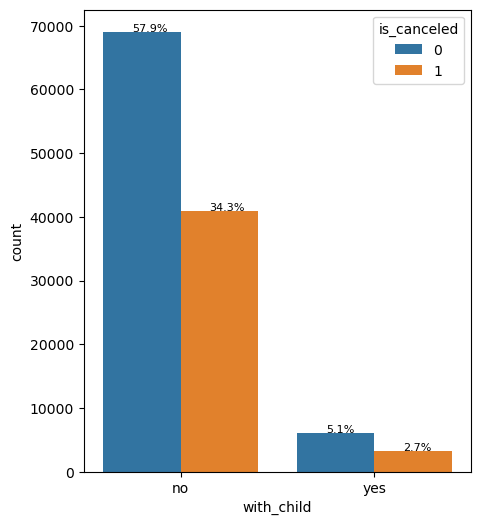

In [599]:
def plt_percente(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 8)
    plt.show()
plt.subplots(figsize=(5,6))
ax = sns.countplot(data=df, x='with_child',
                   hue='is_canceled')

plt_percente(ax, df['with_child'])

In [600]:
#lets drop children and babies now
df.drop(['children','babies'],axis=1,inplace=True)

# After conversions 

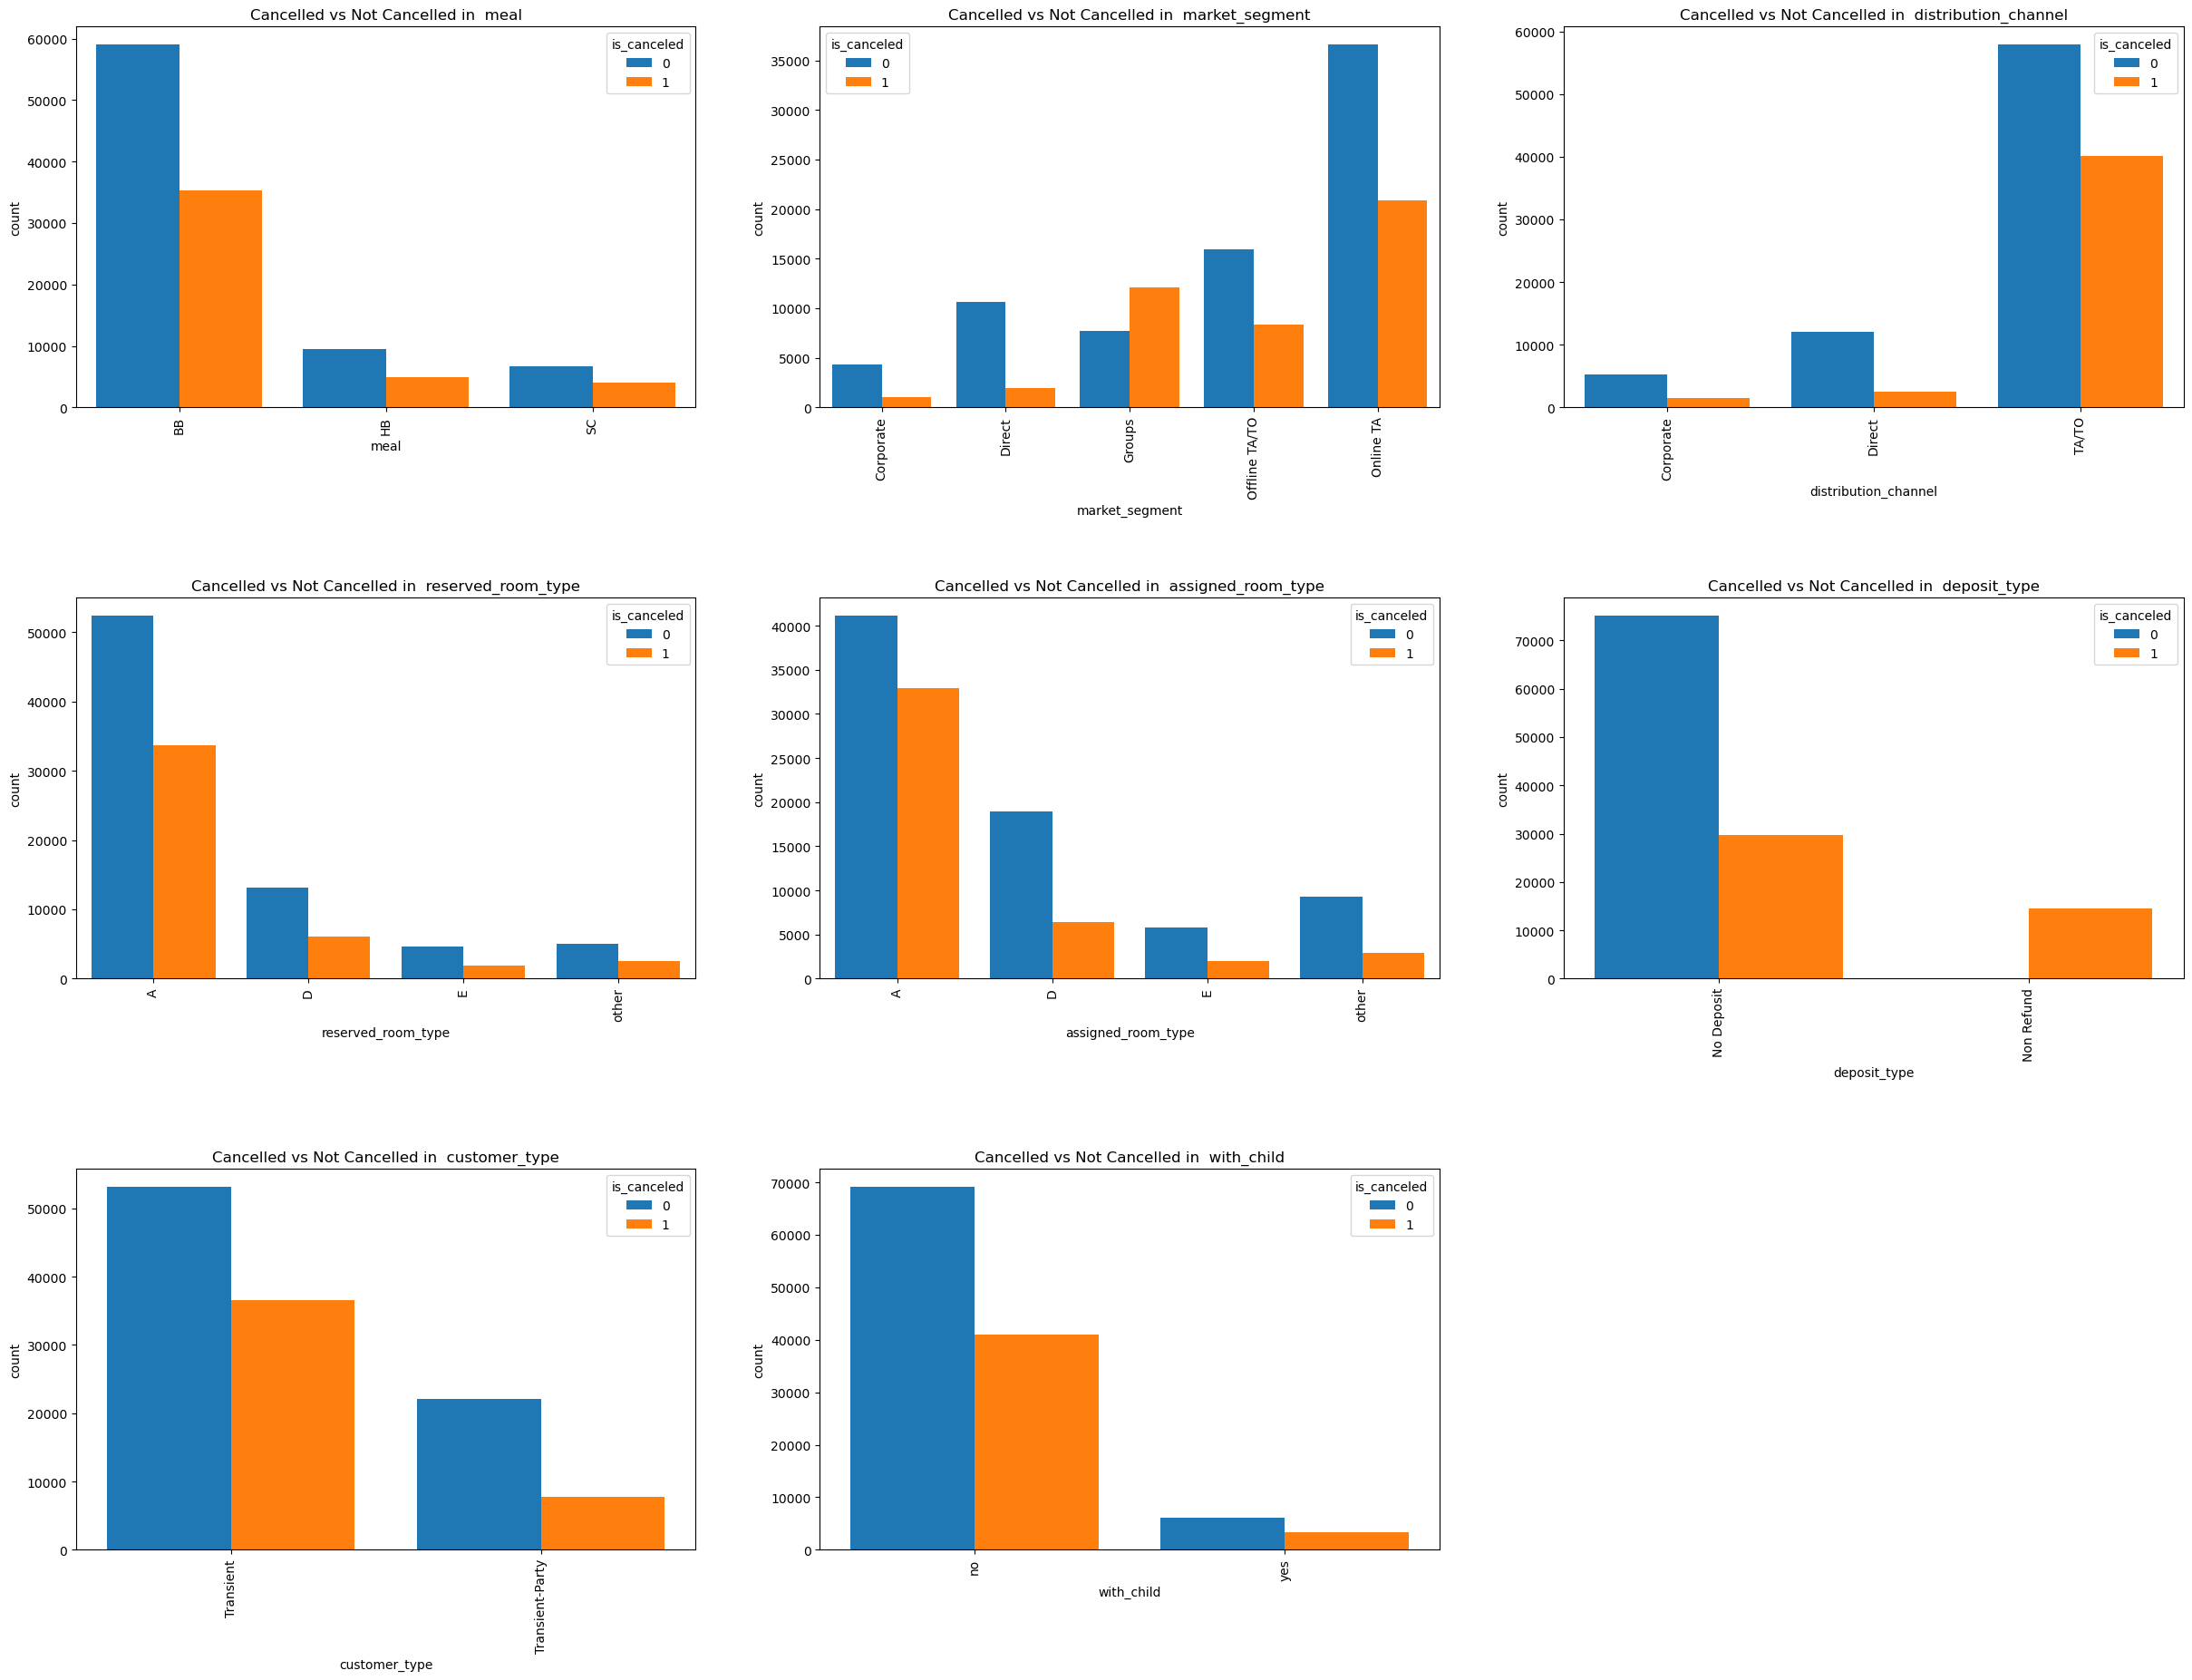

In [601]:
plt.subplots(figsize=(30,30))
col =['meal', 'market_segment','distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type','with_child'] # 'country','reservation_status_date'
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2),3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.countplot(df[i],hue=df['is_canceled'],order=sorted(df[i].unique()),saturation=1)
    plt.title('Cancelled vs Not Cancelled in '+' '+i)
    plt.ticklabel_format()
    plt.xticks(rotation=90)


# now lets see the booking cancellation among different cat features

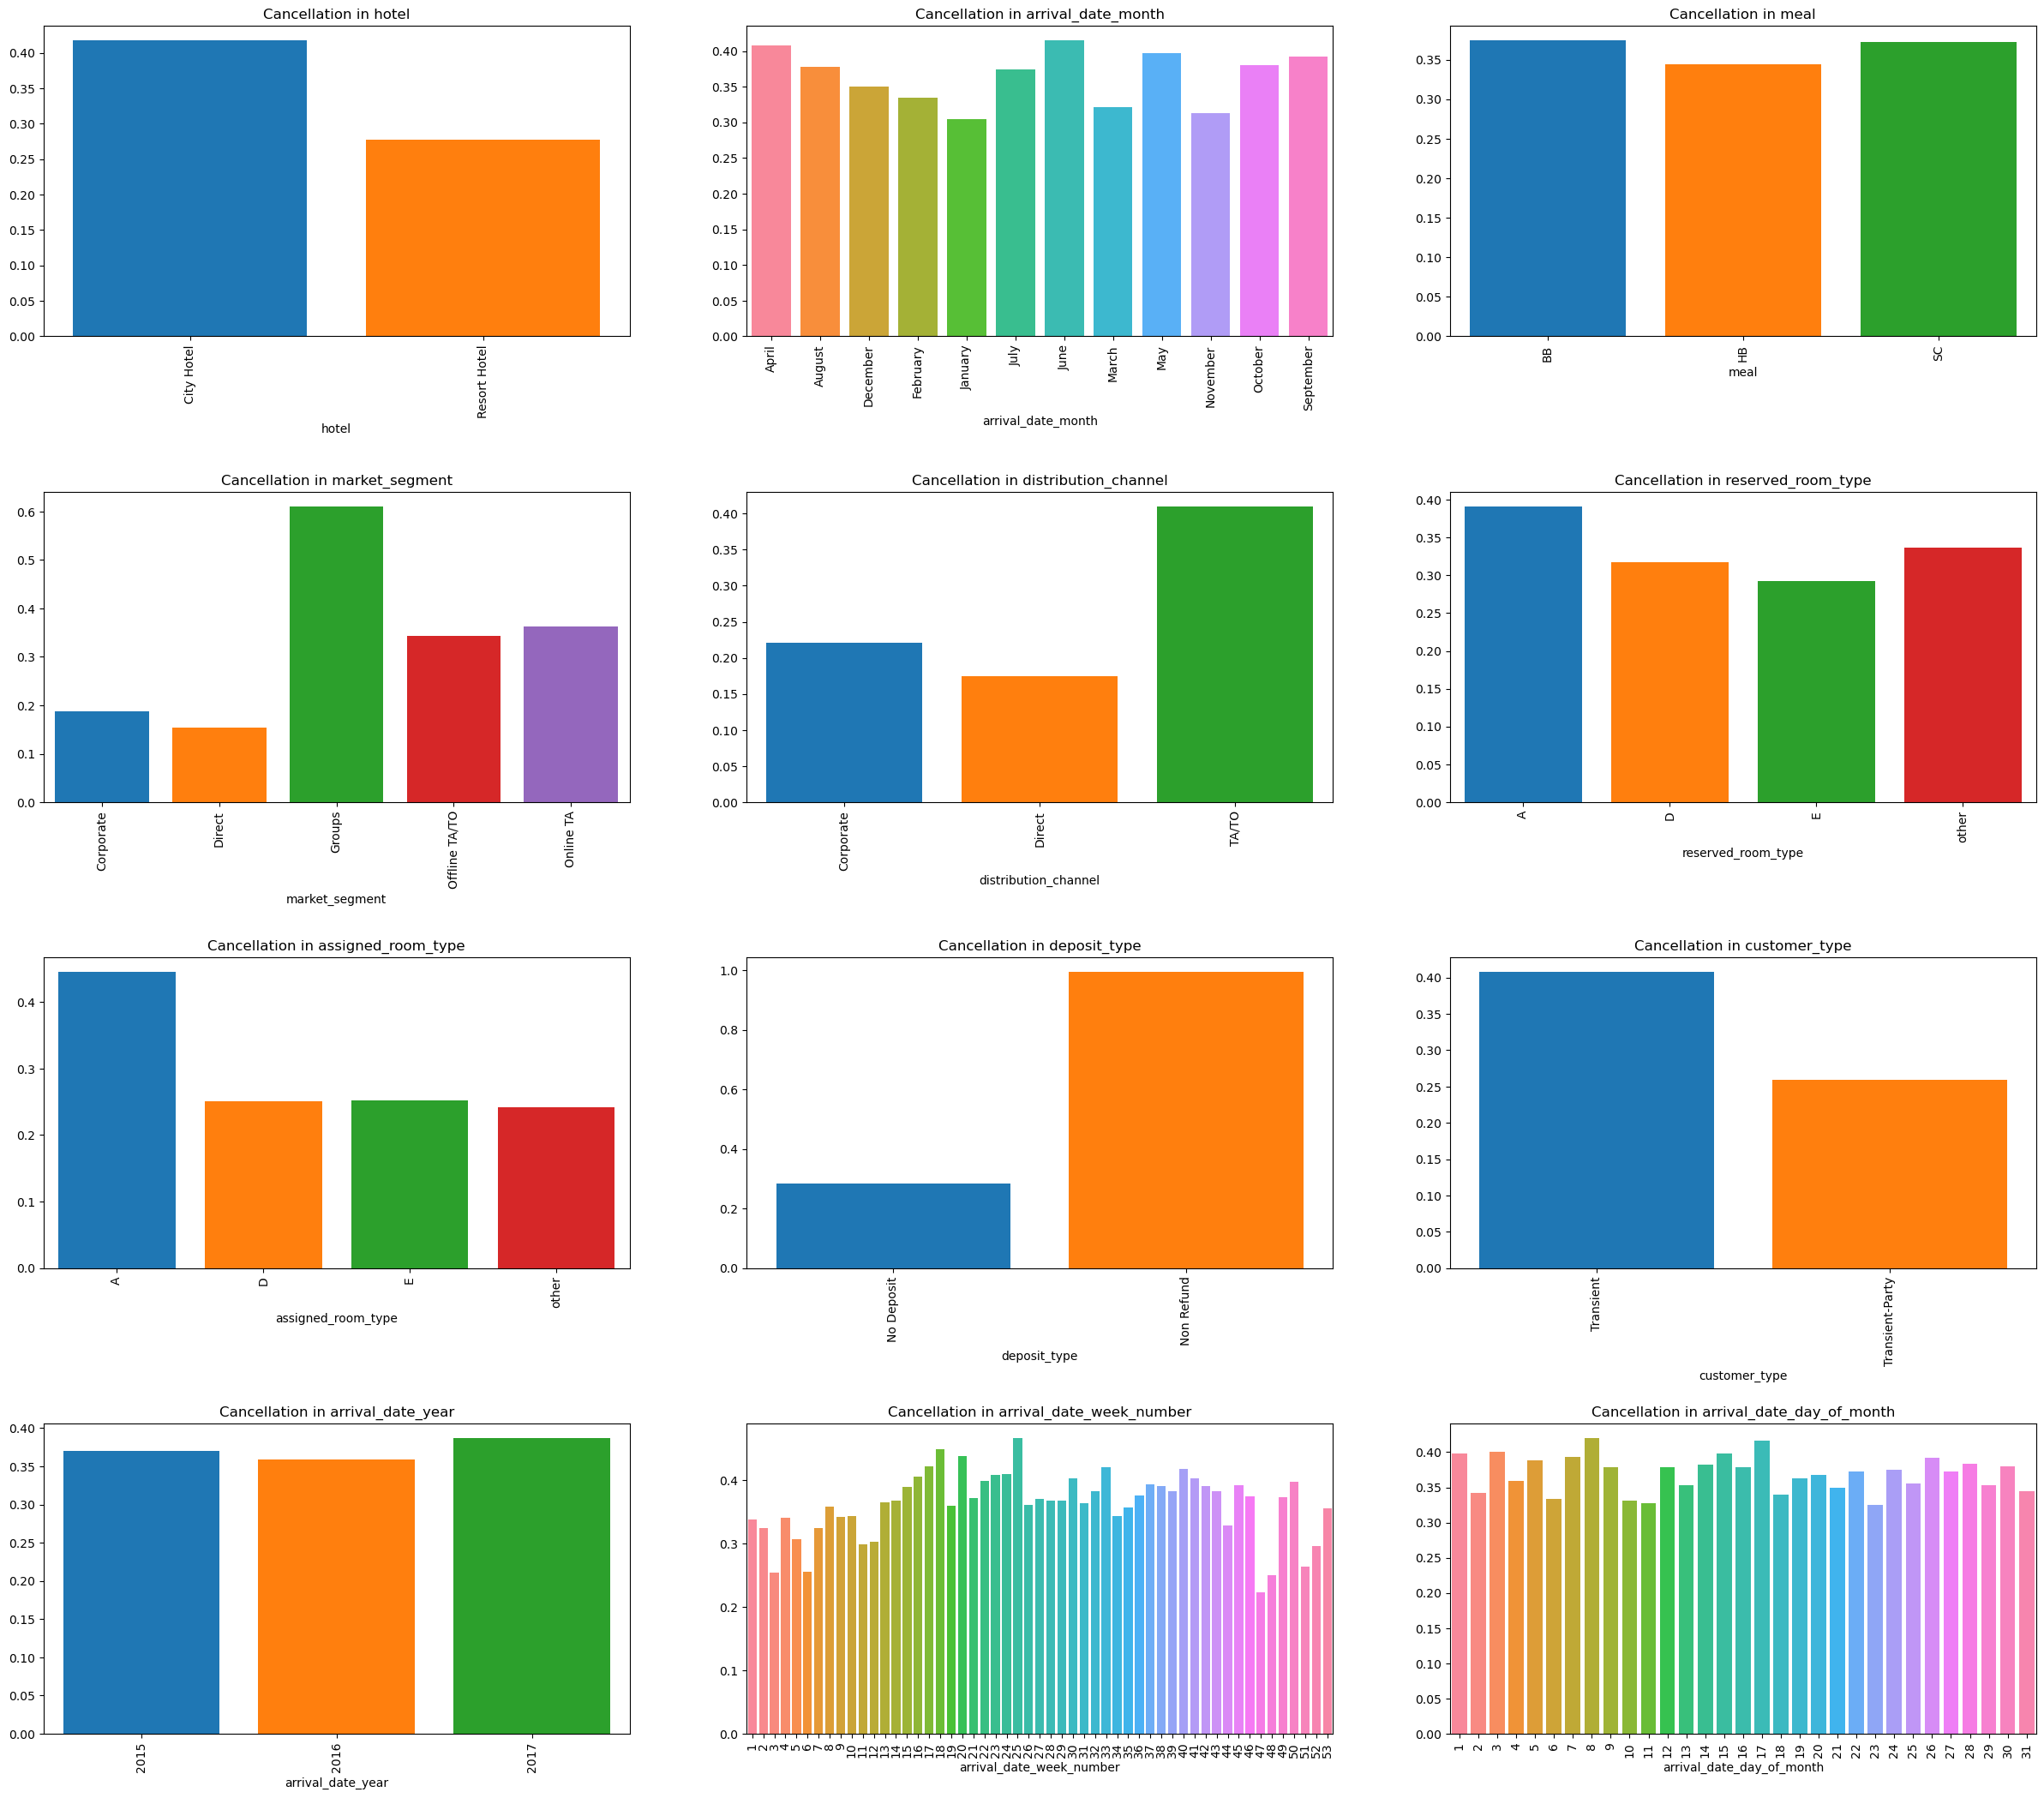

In [602]:
plt.subplots(figsize=(30,40))
col = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type','arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month'] # 'country','reservation_status_date'
lenght = len(col)
for i, j in zip(col, range(lenght)):
    data = df.groupby(i)['is_canceled'].value_counts(normalize=True).loc[:, 1]
    plt.subplot((lenght/2),3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.barplot(x=data.index, y=data.values, saturation=1)
    plt.title('Cancellation in'+' '+i)
    plt.ticklabel_format()
    plt.xticks(rotation=90)


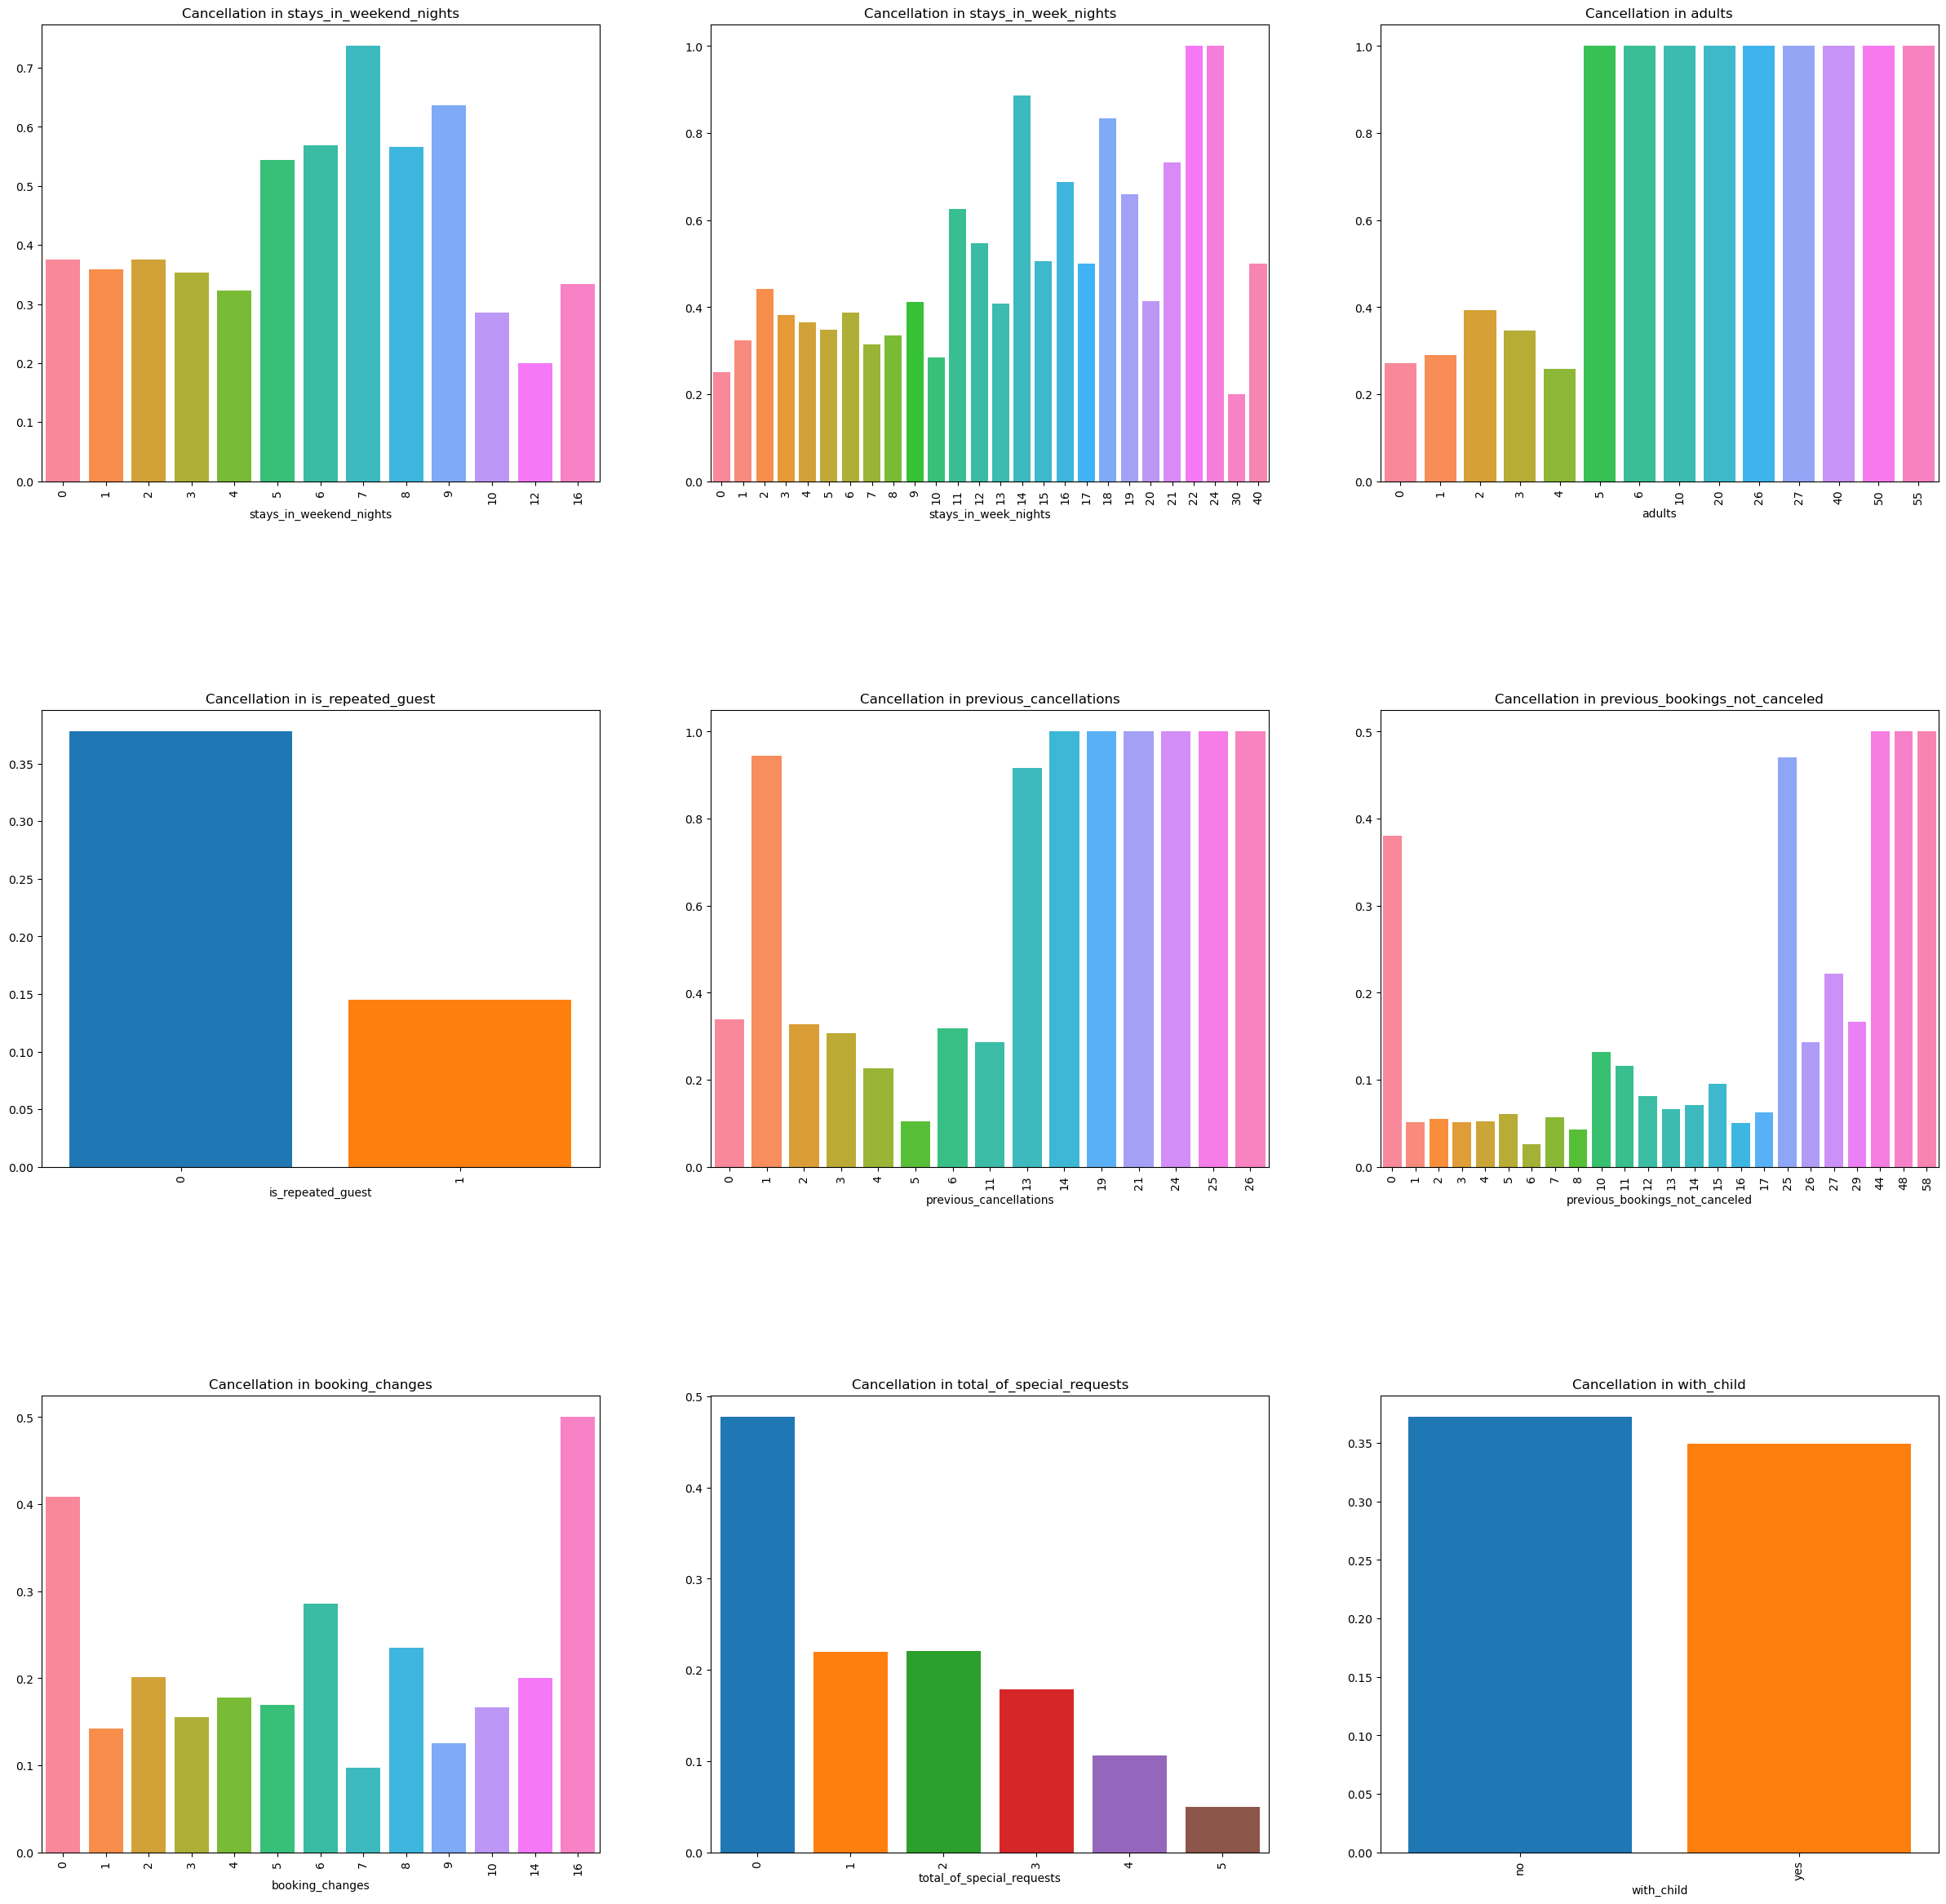

In [603]:
plt.subplots(figsize=(30,40))
col =['stays_in_weekend_nights', 'stays_in_week_nights', 'adults','is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes','total_of_special_requests','with_child']# 'country','reservation_status_date'
lenght = len(col)
for i, j in zip(col, range(lenght)):
    data = df.groupby(i)['is_canceled'].value_counts(normalize=True).loc[:, 1]
    plt.subplot((lenght/2),3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.barplot(x=data.index, y=data.values, saturation=1)
    plt.title('Cancellation in'+' '+i)
    plt.ticklabel_format()
    plt.xticks(rotation=90)


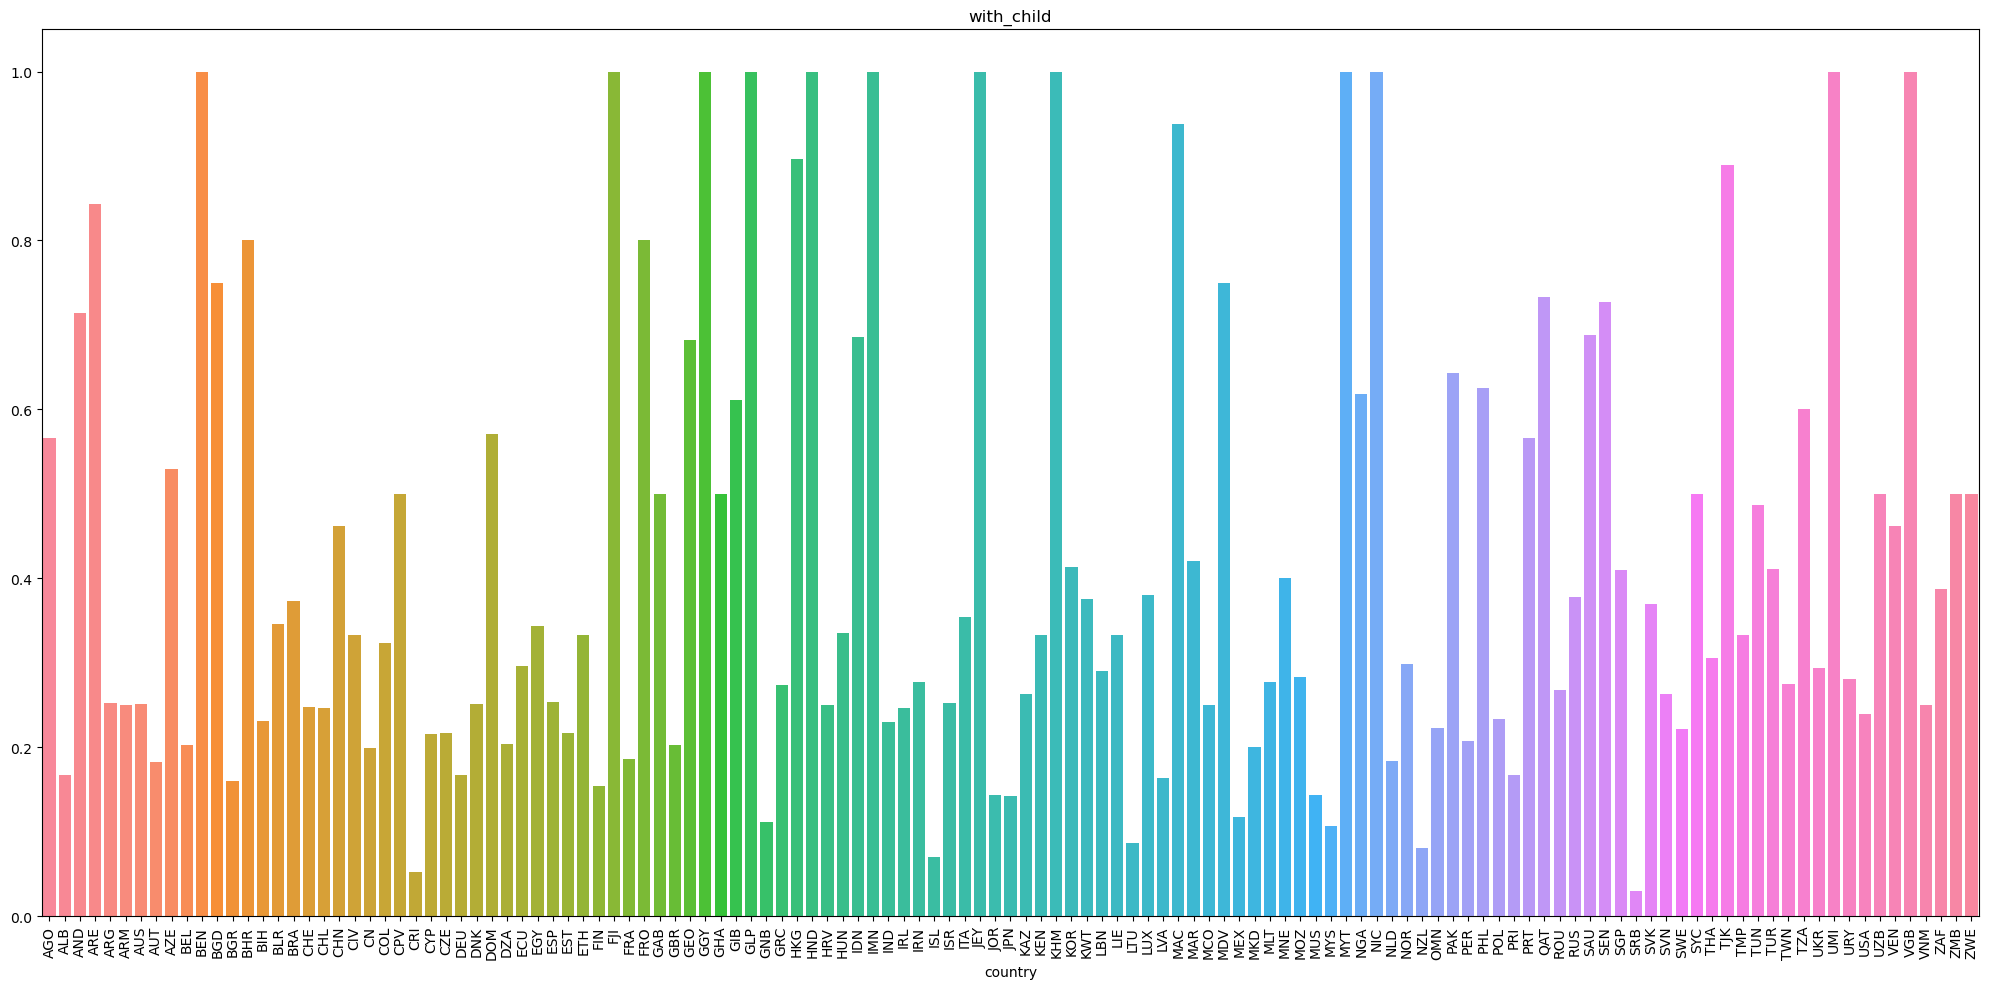

In [604]:
# 'country','reservation_status_date'
plt.figure(figsize=(20,10))
data = df.groupby('country')['is_canceled'].value_counts(normalize=True).loc[:, 1]
sns.barplot(x=data.index, y=data.values, saturation=1)
plt.title(i)
plt.ticklabel_format()
plt.xticks(rotation=90)
plt.tight_layout()

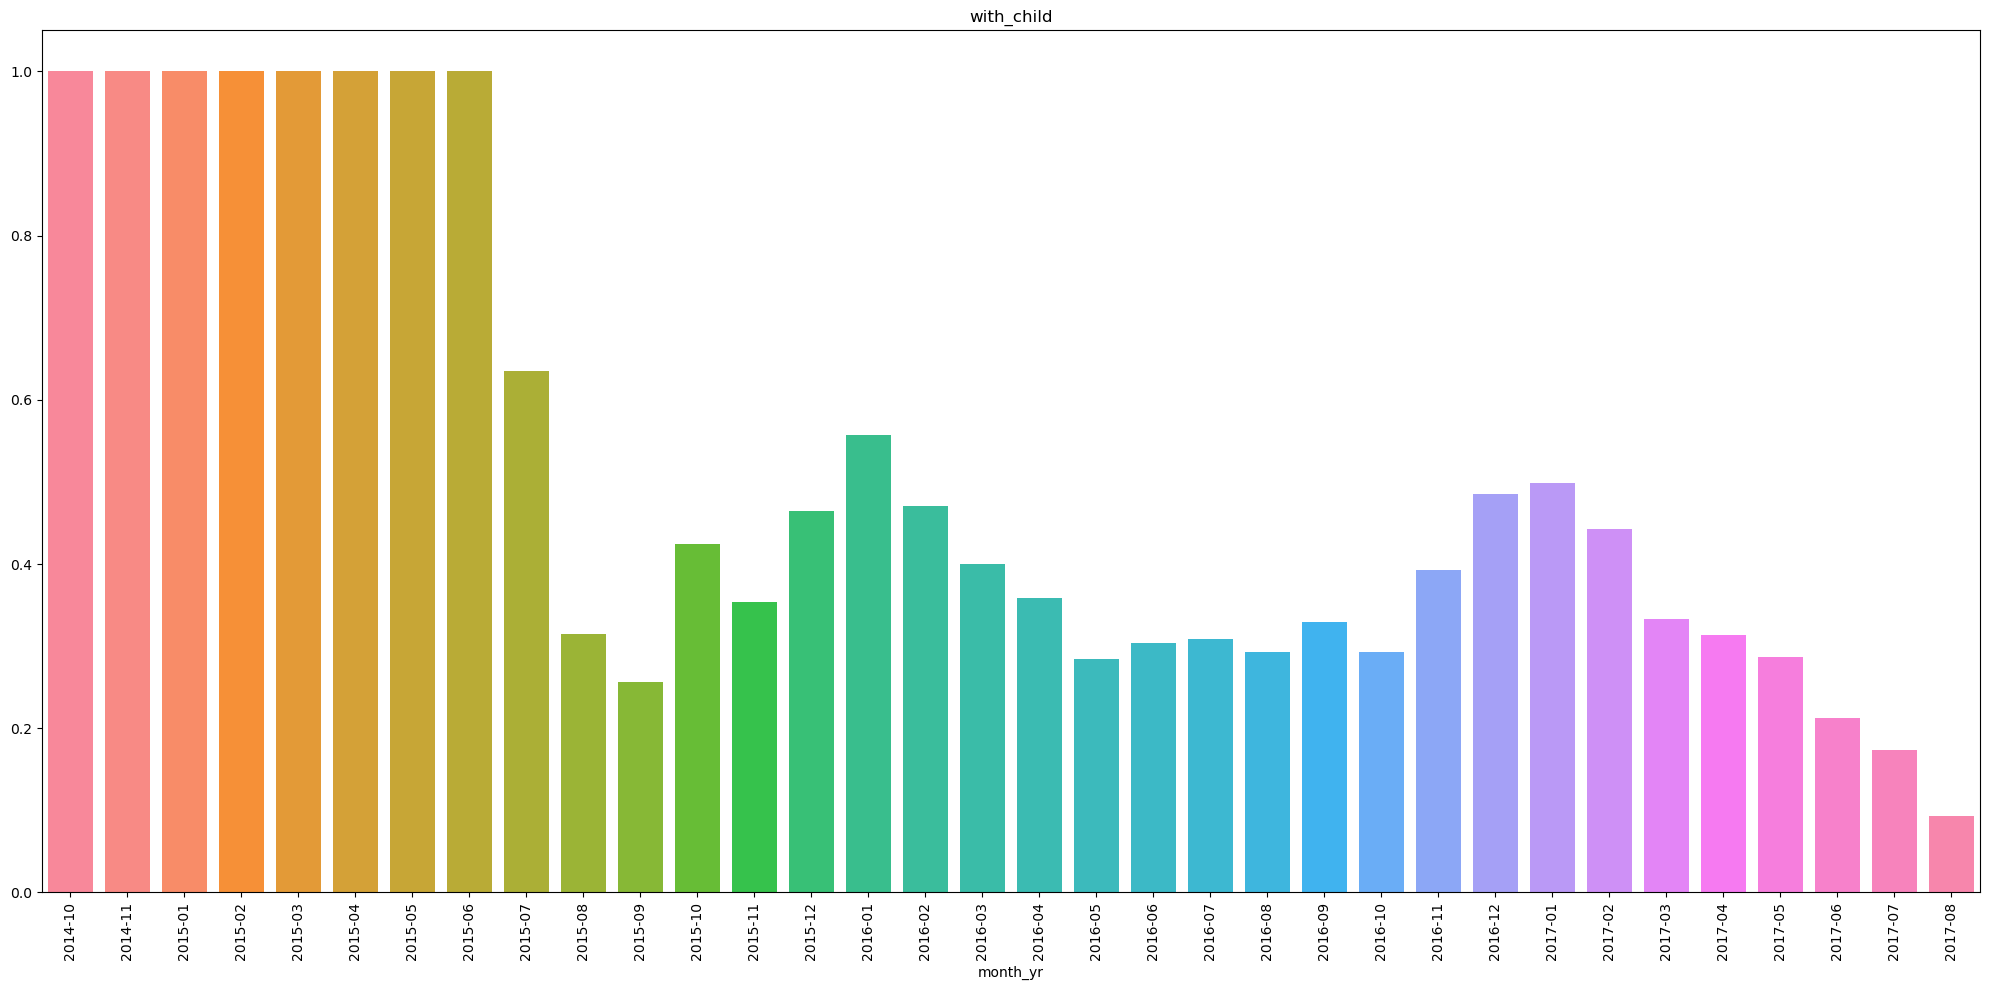

In [605]:
# 'country','reservation_status_date'
plt.figure(figsize=(20,10))
data = df.groupby('month_yr')['is_canceled'].value_counts(normalize=True).loc[:, 1]
sns.barplot(x=data.index, y=data.values, saturation=1)
plt.title(i)
plt.ticklabel_format()
plt.xticks(rotation=90)
plt.tight_layout()

In [606]:
#city hotels have more booking as well as cancellations
#June April month tops in booking cancelling (40%+ contributing)
# groups  have more than  60% cancellations
# booking through dist_channel TA/TO has 42% canclleations 
#Assigned roomtype A are most likly to get canclled
# Non Refunded booking have 99% cancllations
#Transient has 40 % cancellations
#'ARE', 'BEN', 'FJI', 'GGY', 'GLP', 'HKG', 'HND', 'IMN', 
#'JEY', 'KHM','MAC', 'MYT', 'NIC', 'TJK', 'UMI', 'VGB' are countries with 80% booking cancllations
#'CRI', 'ISL', 'LTU', 'NZL', 'SRB' are countries less than 10%  cancellation
#booking done during winter seadon are  more chances of cancellation
#oct 2014 to june 2015 period  has high chances of  cancelations 
#more than 5 adtuls cancellation chances are high even though occurances are less so all these booking are cancelled
#repetaed guets are loyal ones

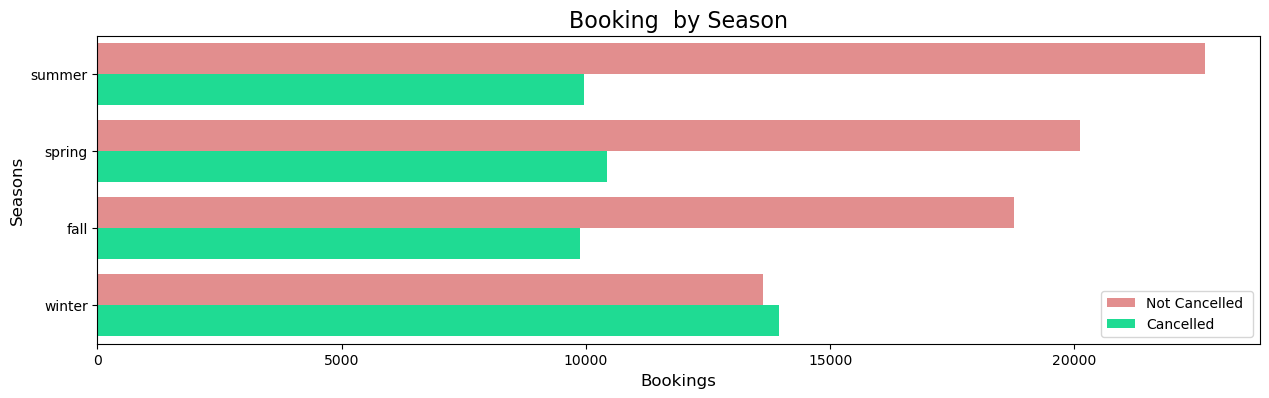

In [672]:
fig = plt.figure(figsize=(15,4),)

colors = ['#F08080', '#00FA9A']

ax = sns.countplot(y='season', data=df,
           hue='is_canceled',
           palette = colors
          ) 

plt.title("Booking  by Season", fontsize=16)
plt.ylabel("Seasons", fontsize=12)
plt.xlabel("Bookings", fontsize=12)
legend_name = plt.legend()
legend_name.get_texts()[0].set_text('Not Cancelled ')
legend_name.get_texts()[1].set_text('Cancelled')

plt.show()
# we can see using seasons we have more seprablity than using months 

In [608]:
#effectiveness
effc= pd.crosstab(df['arrival_date_month'],df['is_canceled'])
effc['diff'] = effc[0]-effc[1]
effc['tot'] = effc[1]+effc[0]
effc["monthly_booking_cancel_per"] = round(effc['diff']/effc['tot'] *100,2)
effc =effc.reindex([ 'January','February','March','April', 'May', 'June','July','August','September','October','November','December' ])
effc

is_canceled,0,1,diff,tot,monthly_booking_cancel_per
arrival_date_month,,,,,
January,4122,1807,2315,5929,39.05
February,5372,2696,2676,8068,33.17
March,6645,3149,3496,9794,35.70
April,6565,4524,2041,11089,18.41
May,7114,4677,2437,11791,20.67
June,6404,4535,1869,10939,17.09
July,7919,4742,3177,12661,25.09
August,8638,5239,3399,13877,24.49
September,6392,4116,2276,10508,21.66


In [674]:

import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Add data

ratio = effc['monthly_booking_cancel_per']

line = go.Scatter(
    x = effc.index,
    y = effc['monthly_booking_cancel_per'],
    text = '(%)',
    mode = 'lines',
    name='monthly_booking_cancel_percentage',
    line = dict(
        color = ('#ff3300'),
        width= 4,
        dash = 'dot',
    
    )

)

data = [line]

layout = dict(title='Cancellation after booking % per Month',
             xaxis=dict(title='arrival_date_month'),
              yaxis=dict(title='monthly_booking_cancel_percentage')
             )

fig = dict(data=data, layout=layout)
iplot(fig)

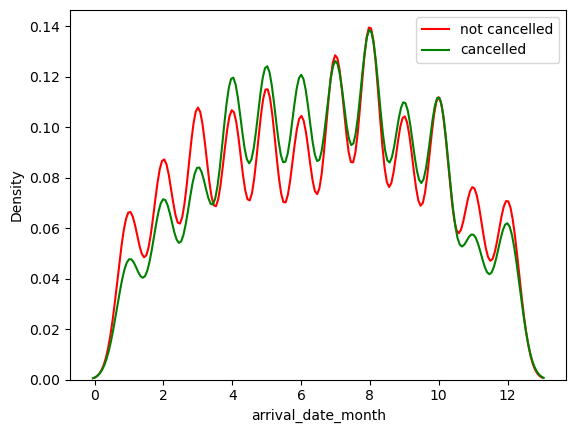

In [610]:
plt.rcdefaults()
data = df.copy('deep')
data['arrival_date_month'].replace({ 'January':1,'February':2,'March':3,'April':4, 'May':5, 'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12},inplace=True)
sns.kdeplot(data[data['is_canceled']== 0]['arrival_date_month'],color='r',label='not cancelled')
sns.kdeplot(data[data['is_canceled']== 1]['arrival_date_month'],color='g',label='cancelled')
plt.legend()

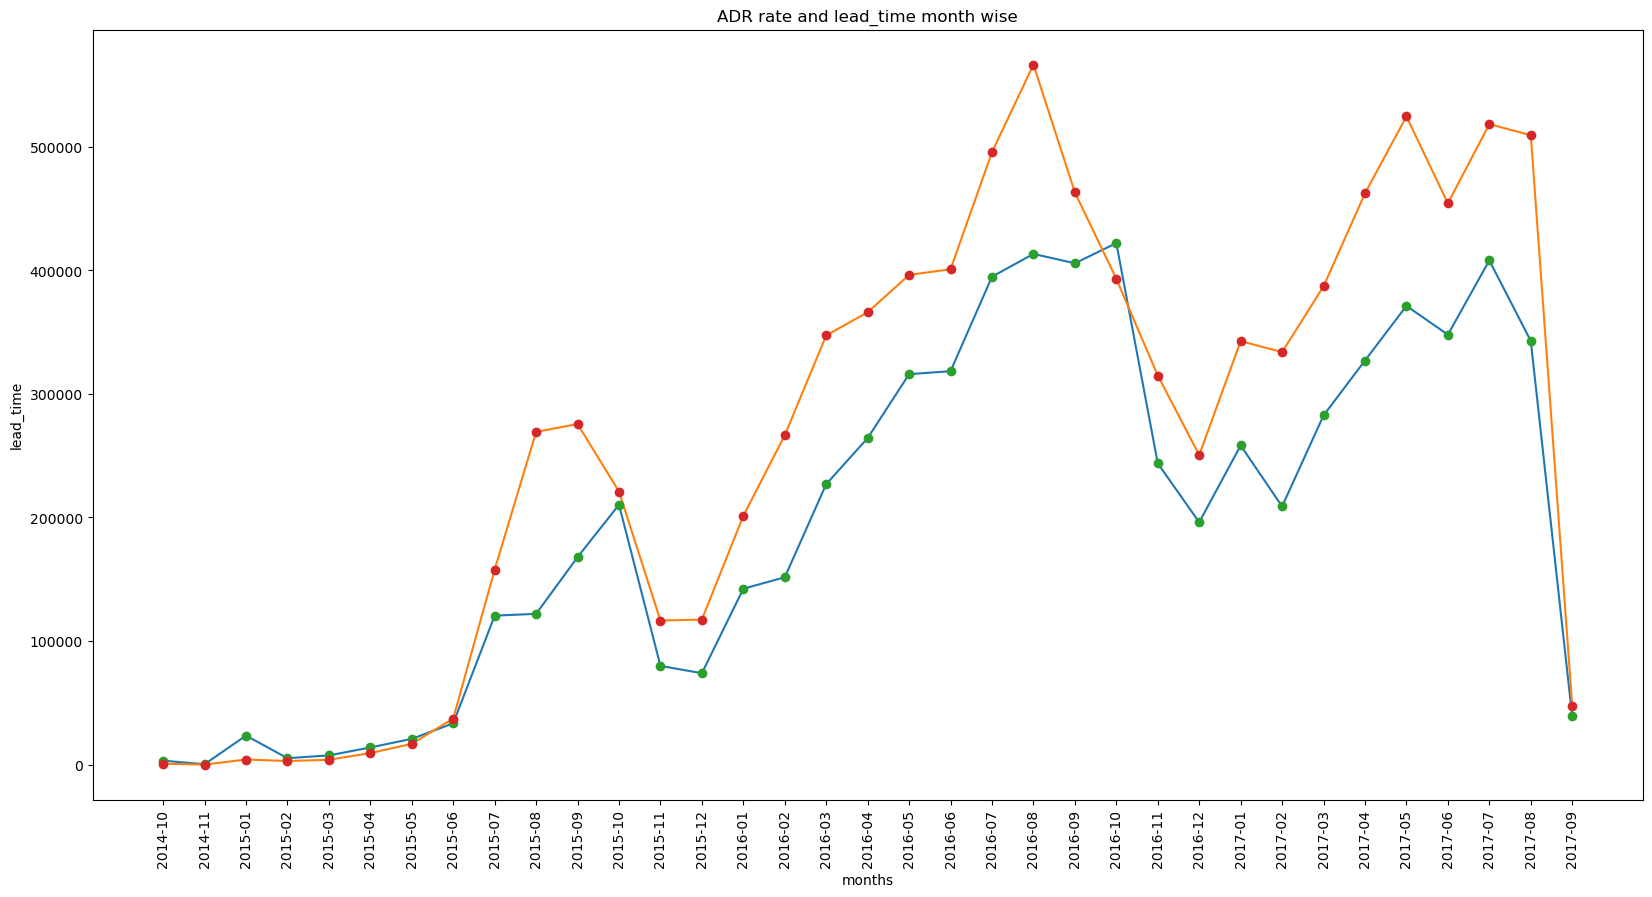

In [611]:
data = df.copy('deep')
data['Month'] = data['reservation_status_date'].apply(lambda s: str(s)[:7])

gap = data.drop_duplicates().groupby(['Month'])['lead_time'].agg(['sum']).sort_values(by=['Month'], ascending=True)
adr_rate = data.drop_duplicates().groupby(['Month'])['adr'].agg(['sum']).sort_values(by=['Month'], ascending=True)
x = pd.Series(gap.index.values)
x
y = gap['sum']
y1 = adr_rate['sum']
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.plot(x,y1)
plt.plot_date(x,y)
plt.plot_date(x,y1)
plt.xticks(rotation=90)
plt.xlabel('months')
plt.ylabel('lead_time')
plt.title('ADR rate and lead_time month wise')
plt.show()

In [613]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status_date,month_yr,Month,season,with_child
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,BB,PRT,Direct,Direct,0,0,0,other,other,3,No Deposit,NaN,0,Transient,0.0,0,2015-07-01,2015-07,7,summer,no
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,BB,PRT,Direct,Direct,0,0,0,other,other,4,No Deposit,NaN,0,Transient,0.0,0,2015-07-01,2015-07,7,summer,no
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,BB,GBR,Direct,Direct,0,0,0,A,other,0,No Deposit,NaN,0,Transient,75.0,0,2015-07-02,2015-07,7,summer,no
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,2015-07-02,2015-07,7,summer,no
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,1,2015-07-03,2015-07,7,summer,no


In [614]:
df.drop(['month_yr','Month'],axis=1,inplace=True)

# correlation

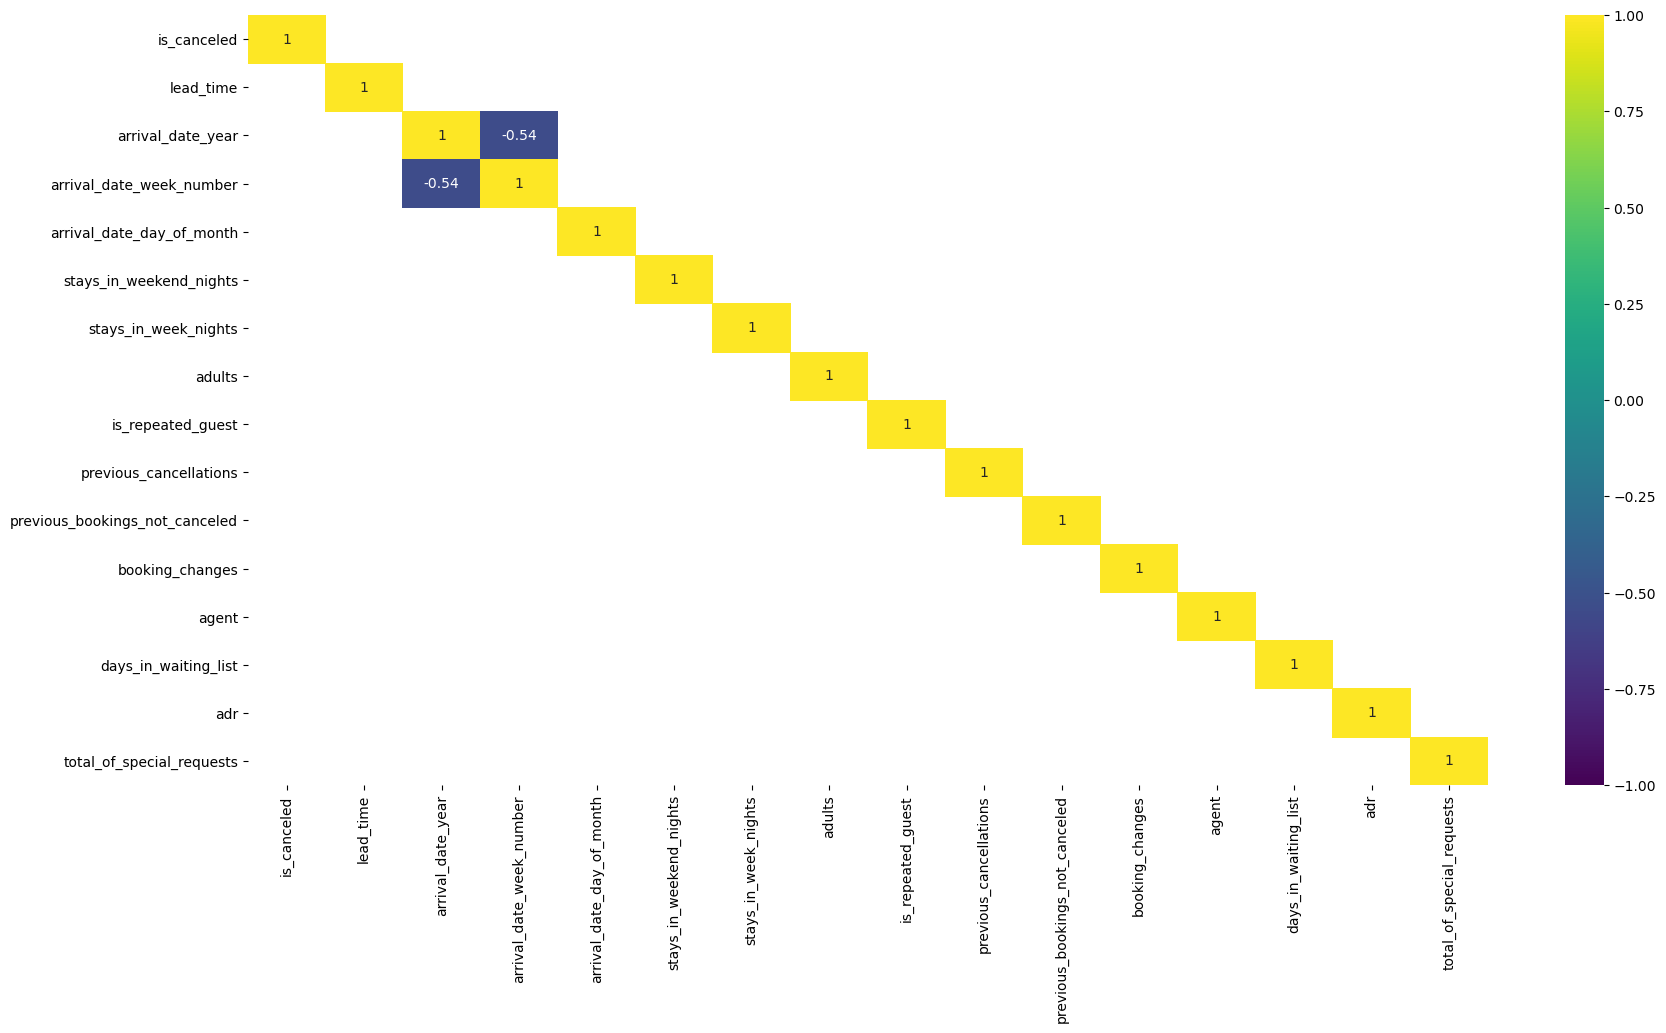

In [615]:
#correlation 
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr[(corr>0.50)|(corr<-0.50)],vmax=1,vmin=-1,cmap='viridis',annot=True)
plt.ticklabel_format()

In [616]:
#no good correlation btwn the features

<AxesSubplot:title={'center':'Correlation with target'}>

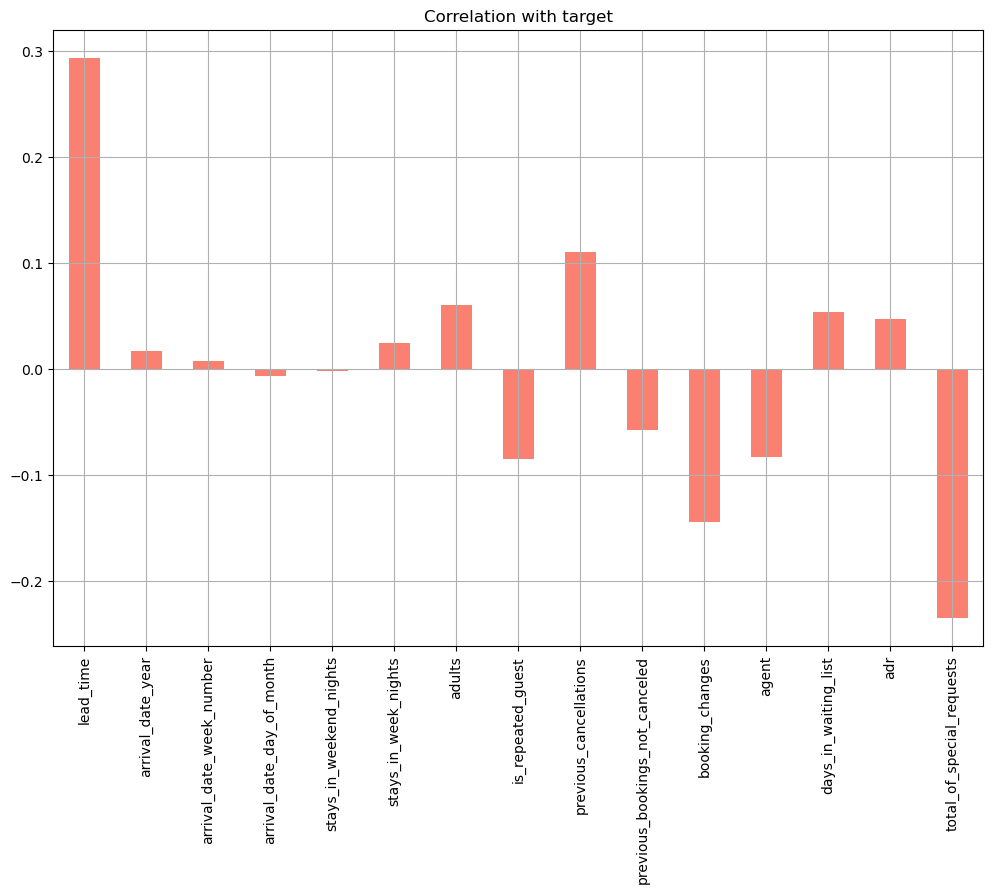

In [617]:
df['is_canceled'] = df['is_canceled'].astype('int')
df.drop('is_canceled', axis=1).corrwith(df['is_canceled']).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target",color="salmon")


In [618]:
#Outliers

In [649]:
df.kurtosis()

is_canceled                       -1.712005
lead_time                          0.831653
arrival_date_year                 -0.994564
arrival_date_week_number          -0.986077
arrival_date_day_of_month         -1.187168
stays_in_weekend_nights            7.174066
stays_in_week_nights               3.287854
adults                             0.760381
is_repeated_guest                 26.370077
previous_cancellations            13.471059
previous_bookings_not_canceled    47.642500
booking_changes                   79.393605
agent                             -0.007180
days_in_waiting_list              41.165017
adr                                0.941622
total_of_special_requests          0.718562
dtype: float64

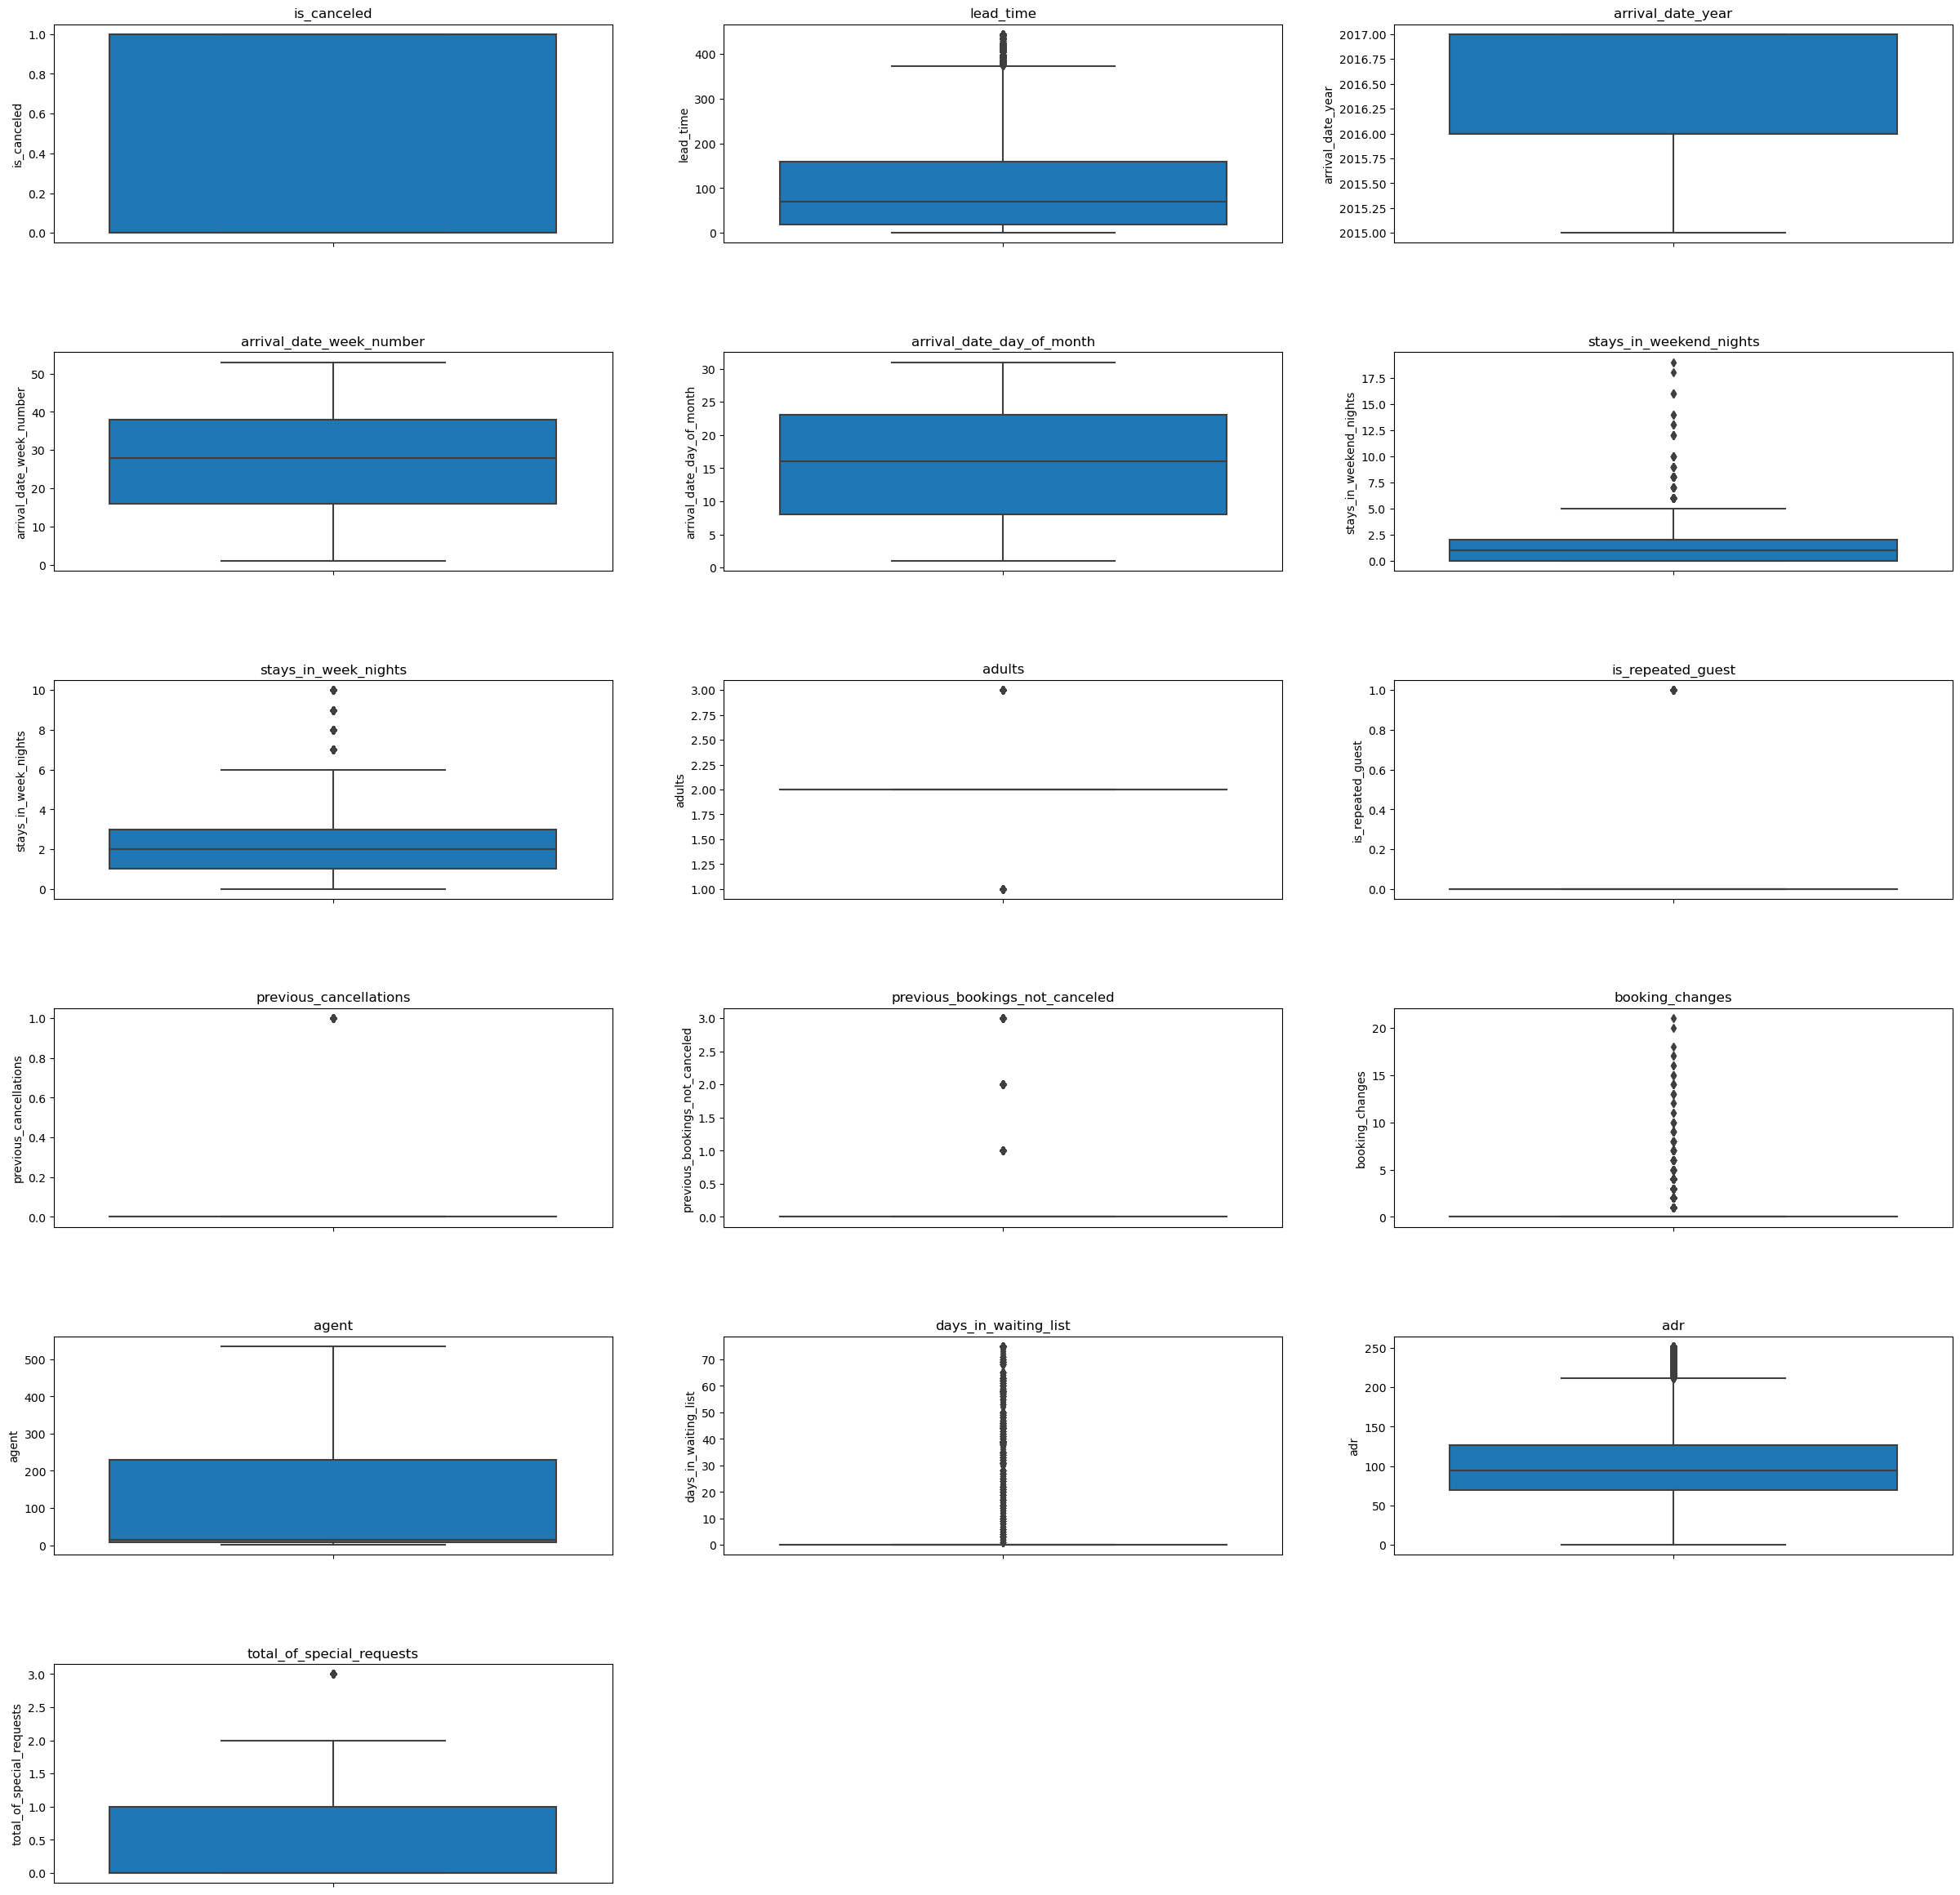

In [648]:
#plot outliers:
df_num = df.select_dtypes(exclude='object')
plt.subplots(figsize=(30,40))
col =df_num.columns
lenght = len(col)
for i, j in zip(col, range(lenght)):
    plt.subplot((lenght/2),3, j+1)
    plt.subplots_adjust(wspace=.2, hspace=.5)
    sns.boxplot(y=df[i],saturation=1)
    plt.title(i)
    plt.ticklabel_format()
    plt.xticks(rotation=90)



In [654]:
#% outliers
df_num = df.select_dtypes(exclude='object')
for k, v in df_num.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_num)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))


Column is_canceled outliers = 0.00%
Column lead_time outliers = 2.54%
Column arrival_date_year outliers = 0.00%
Column arrival_date_week_number outliers = 0.00%
Column arrival_date_day_of_month outliers = 0.00%
Column stays_in_weekend_nights outliers = 0.29%
Column stays_in_week_nights outliers = 4.06%
Column adults outliers = 100.00%
Column is_repeated_guest outliers = 100.00%
Column previous_cancellations outliers = 100.00%
Column previous_bookings_not_canceled outliers = 100.00%
Column booking_changes outliers = 100.00%
Column agent outliers = 0.00%
Column days_in_waiting_list outliers = 100.00%
Column adr outliers = 3.18%
Column total_of_special_requests outliers = 2.41%


In [526]:
#adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list-->100% outliers lets check
#lead_time,stays_in_week_nights,adr,total_of_special_requests 2-5% oulters 

In [642]:
#lets see if these are really anomally values or mathemtical outliers
df[['adults','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','days_in_waiting_list']].quantile(np.arange(0.0, 1.1, 0.1), axis = 0)



,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list
0.0,1.0,0.0,0.0,0.0,0.0
0.1,1.0,0.0,0.0,0.0,0.0
0.2,2.0,0.0,0.0,0.0,0.0
0.3,2.0,0.0,0.0,0.0,0.0
0.4,2.0,0.0,0.0,0.0,0.0
0.5,2.0,0.0,0.0,0.0,0.0
0.6,2.0,0.0,0.0,0.0,0.0
0.7,2.0,0.0,0.0,0.0,0.0
0.8,2.0,0.0,0.0,0.0,0.0
0.9,2.0,0.0,0.0,0.0,0.0


In [641]:
#is_repeated_guest is not an oulier but matmnetically it gives and most of values are 0
# in 10 percentile we cansee outliers for adults ,previous_can,previous_book_not cacelled and waitlist days
#lets cap the 10th percentile values 
for col in ['adults','previous_cancellations','previous_bookings_not_canceled','days_in_waiting_list']:
        percentiles = df[col].quantile([0.01, 0.99]).values
        df[col] = np.clip(df[col], percentiles[0], percentiles[1])

In [645]:
#lets see if these are really anomally values or mathemtical outliers
df[['lead_time','stays_in_week_nights','adr','total_of_special_requests']].quantile(np.arange(0.0, 1.1, 0.1), axis = 0)

#all these colums had huge outliers because the data set contains 0 values for mostthese distribution 


,lead_time,stays_in_week_nights,adr,total_of_special_requests
0.0,0.0,0.0,0.000,0.0
0.1,3.0,1.0,50.000,0.0
0.2,11.0,1.0,64.000,0.0
0.3,26.0,1.0,75.000,0.0
0.4,45.0,2.0,85.000,0.0
0.5,69.0,2.0,94.575,0.0
0.6,99.0,2.0,105.000,1.0
0.7,138.0,3.0,118.150,1.0
0.8,184.0,4.0,135.000,1.0
0.9,265.0,5.0,164.000,2.0


In [644]:
for col in ['lead_time','stays_in_week_nights','adr','total_of_special_requests']:
        percentiles = df[col].quantile([0.01, 0.99]).values
        df[col] = np.clip(df[col], percentiles[0], percentiles[1])


In [655]:
##After floor and capping the values looks Plausible now

In [667]:
#Encoding Cat fetures

In [704]:
df.head()


In [705]:
col = df.drop('is_canceled',axis=1).columns
col

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'days_in_waiting_list', 'adr',
       'total_of_special_requests', 'with_child', 'hotel_Resort Hotel',
       'meal_HB', 'meal_SC', 'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Direct', 'distribution_channel_TA/TO',
       'reserved_room_type_D', 'reserved_room_type_E',
       'reserved_room_type_other', 'assigned_room_type_D',
       'assigned_room_type_E', 'assigned_room_type_other',
       'deposit_type_Non Refund', 'customer_type_Transient-Party',
       'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [671]:
df.drop(['reservation_status_date'],axis=1,inplace=True)

In [675]:
df.drop(['arrival_date_month'],axis=1,inplace=True) # seasons we can have better separabilty compared to months

In [678]:
df.replace({'yes':1,'no':0},inplace=True)

In [692]:
df.select_dtypes(include='object').nunique().index

Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'season'],
      dtype='object')

In [688]:
#for countries we have 177 unique values so lets do label encoding to compensate the dimensonality reduction we will drop this col

In [689]:
df.drop(['country'],axis=1,inplace=True)

In [690]:
df.shape

(119390, 26)

In [694]:
df = pd.get_dummies(data=df,columns=['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'season'],drop_first=True)

In [695]:
#after encoding 
df.shape

(119390, 37)

In [697]:
#Missing values impute

In [698]:
df.isnull().mean()[df.isnull().mean()>0]*100
# % of null values in missing data columns

agent    13.686238
dtype: float64

In [696]:
x = df.drop('is_canceled',axis=1)

In [714]:
#using iterative imputer as we can predict the missing values instead of randomly assign mean or median
#itr_imputer =IterativeImputer(estimator=ExtraTreesRegressor(),max_iter=3, random_state=42)
#start=time.process_time()
#itr_imputer.fit(x) 
#end =time.process_time()
#print('Processing Time :',end-start)

In [709]:
#x= itr_imputer.transform(x)
#x = pd.DataFrame(x,columns=col)
#x.to_csv('independent_features_imputed.csv',index=False)

# #This takes Huge time to compute so i have run this and store the result for future use

In [713]:
x= pd.read_csv('independent_features_imputed.csv')# Reading the imputed and stored values 

In [716]:
y = df['is_canceled']

In [719]:

#split train test split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.4,stratify=y,random_state=14)

In [720]:
#scaling
scl = StandardScaler() 
#scl the feature based on mean and std ...i have preferd standrisation coz features can take form of normal distribution
#this will make models to learn weights easily and also will make less sentive to outliers 
scl.fit(xtrain)

StandardScaler()

In [721]:
xtrain_scl = pd.DataFrame(scl.transform(xtrain))
xtest_scl = pd.DataFrame(scl.fit_transform(xtest))
xtest_scl.columns = xtest.columns 
xtrain_scl.columns = xtrain.columns 

In [724]:
#Multicolinarity check using VIF

vif = pd.DataFrame()
X =  pd.DataFrame(xtrain_scl)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#A rule of thumb for interpreting the variance inflation factor:

#1 = not correlated.
#Between 1 and 5 = moderately correlated.
#Greater than 5 = highly correlated.

,Features,VIF
22,market_segment_Online TA,18.74
21,market_segment_Offline TA/TO,12.15
19,market_segment_Direct,10.75
20,market_segment_Groups,10.17
23,distribution_channel_Direct,9.65
24,distribution_channel_TA/TO,8.29
29,assigned_room_type_E,3.39
26,reserved_room_type_E,3.36
27,reserved_room_type_other,2.89
25,reserved_room_type_D,2.80


In [725]:
# WE Can see some multicollearity btw features so instead of removing these features one after another and checking VIF
#lets go for PCA , this is a dimensional reduction techique .
#this will transofrm all the features into higher dimensional axes and each axes will have combition of features 
#all these axes will be orthogonal to each other so the multicolleraity will also be handled 

In [727]:

pca = PCA()
pca.fit(xtrain_scl)


PCA()

In [728]:
pca.explained_variance_ #each PC axes variance 

array([3.63991872, 3.21816756, 2.55352298, 2.28630584, 2.03821368,
       1.8113655 , 1.80108127, 1.49676965, 1.4096888 , 1.29653261,
       1.24894332, 1.10635943, 1.08964812, 1.00730622, 0.91127396,
       0.89326037, 0.84272052, 0.80284134, 0.77132484, 0.73764651,
       0.6436862 , 0.57742668, 0.55147212, 0.51841265, 0.49570462,
       0.31612706, 0.30796969, 0.25480437, 0.24560645, 0.23732395,
       0.23279412, 0.20574641, 0.18687526, 0.13061299, 0.1144541 ,
       0.01859466])

In [730]:
pca.components_ #variance in each pc for different feature

array([[-0.22836321,  0.1368773 , -0.04854562, ...,  0.06445362,
         0.08257884, -0.07315696],
       [-0.0356868 , -0.11546184,  0.0159464 , ..., -0.04414954,
        -0.06416572,  0.06432692],
       [ 0.2635621 , -0.17698997,  0.22688913, ..., -0.14224427,
         0.19401534, -0.13985263],
       ...,
       [-0.01553382, -0.03669791, -0.02880116, ..., -0.02940501,
        -0.02586934, -0.02583646],
       [-0.00374501, -0.00930334, -0.01834497, ..., -0.01552456,
        -0.01581615, -0.00780234],
       [ 0.00411263,  0.0048803 ,  0.00547741, ..., -0.00211434,
        -0.00253552, -0.00530525]])

Text(0.5, 1.0, 'Variation covered by the PC Components')

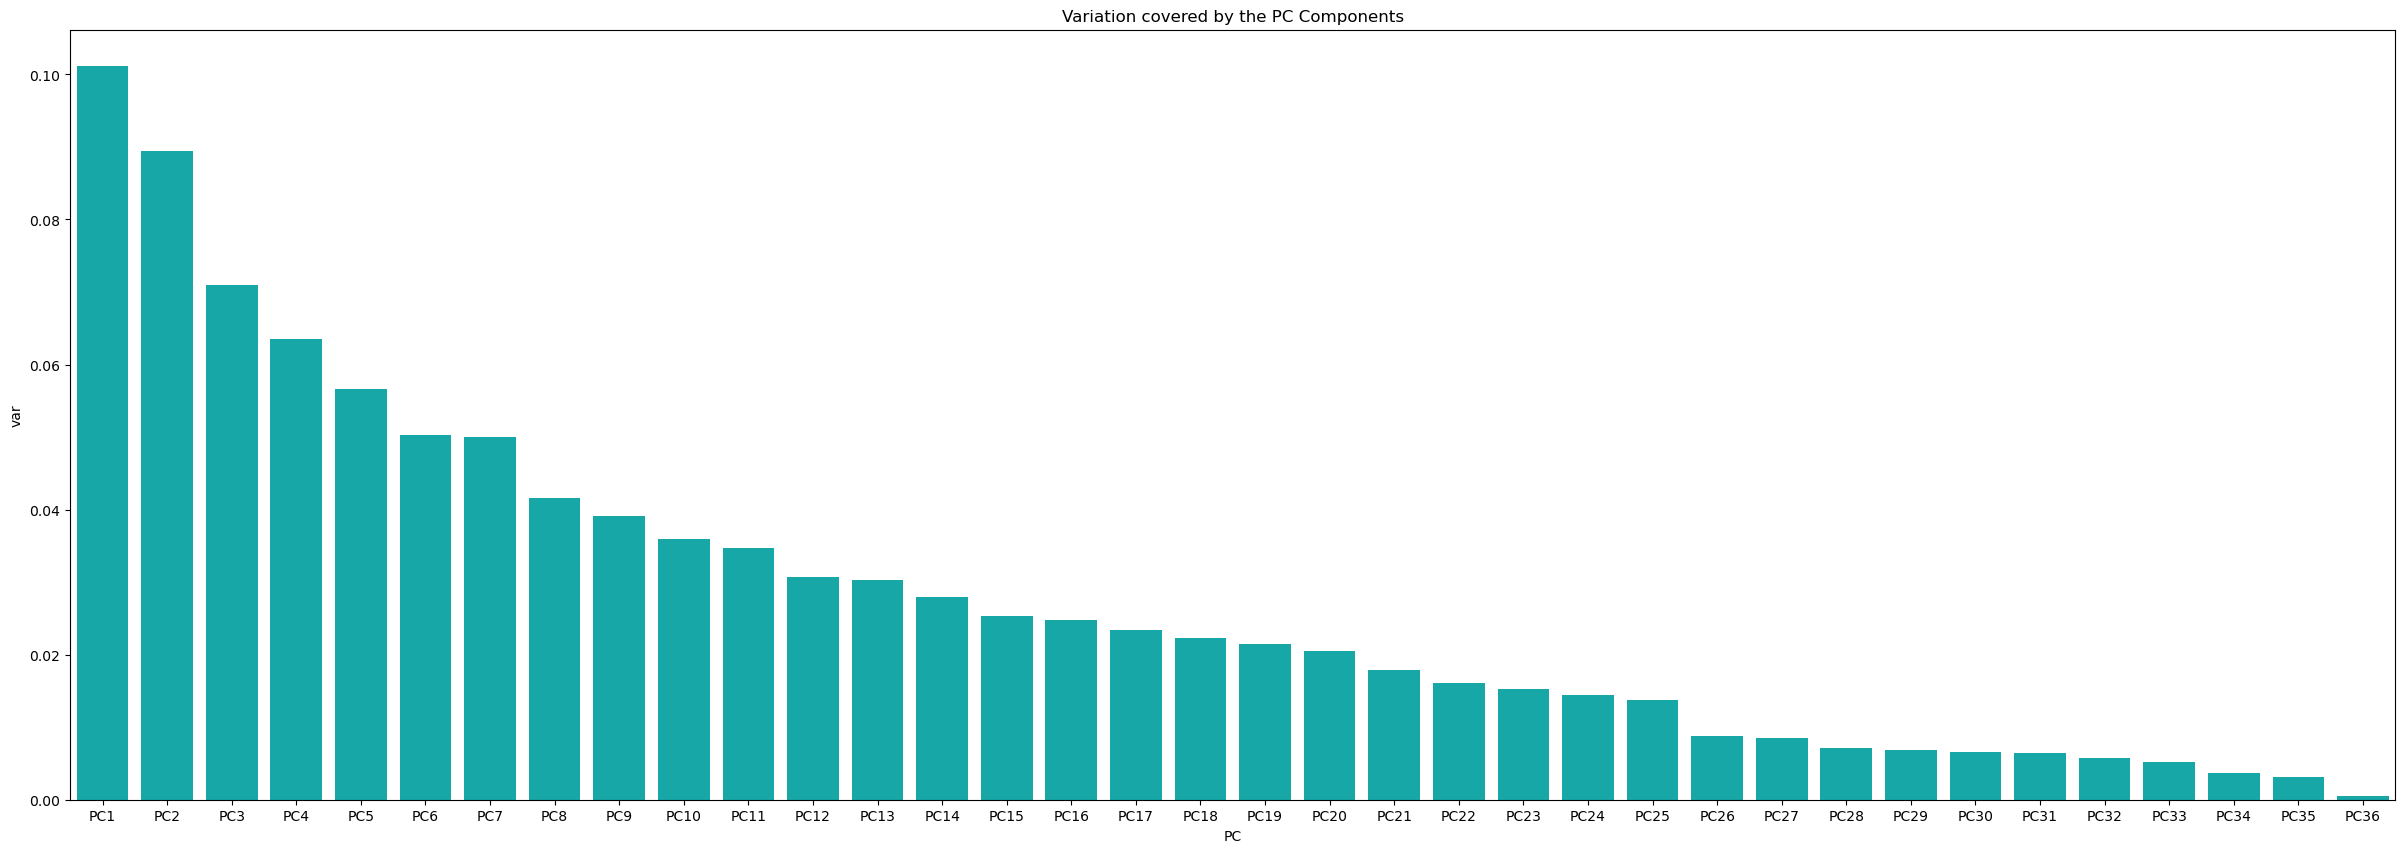

In [733]:
PC = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
     'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
     'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
     'PC31','PC32','PC33','PC34','PC35','PC36']
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':PC})
plt.figure(figsize=(30,10))
sns.barplot(x='PC',y="var", data=pca_df, color="c")
plt.title('Variation covered by the PC Components')

In [736]:
fig =px.line(np.cumsum(pca.explained_variance_ratio_),labels=["number of components","cumulative explained variance"])
fig.add_hline(y=0.9)
fig.show()

In [737]:
# In this case, to get 90% of variance explained we would  need 22 principal components.

In [738]:
pca=PCA(n_components=22)
pca.fit(xtrain_scl)
Xtrain_PCA = pca.transform(xtrain_scl)
Xtest_PCA = pca.transform(xtest_scl)



In [739]:
Xtrain_PCA

array([[-2.36304684,  0.30258883, -0.64294272, ..., -0.4157442 ,
         0.65105297,  0.15147112],
       [-2.1864824 ,  0.11375448, -0.6715236 , ..., -0.8932569 ,
         0.14584651, -0.07120905],
       [-0.96169699,  0.71064139,  1.3510257 , ..., -0.6246941 ,
         0.18177749,  0.85822169],
       ...,
       [-0.40130999,  1.1728226 , -1.04726541, ...,  0.09534259,
         0.65397804,  0.03129604],
       [ 1.14966509,  3.88167716, -1.12616057, ...,  0.90561431,
         0.31382559, -0.2248837 ],
       [ 0.41908269, -0.01794042,  1.85101883, ..., -2.04048157,
         1.05198415, -1.15785976]])

In [745]:
# Python program to show time by process_time() 

dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

no_classifiers = len(dict_classifiers.keys())

def batch_classify(xtrain_scl, ytrain,xtest_scl,ytest, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,7)), columns = ['classifier', 'train_score','test_score','Precision_score','Recall_score','F1_score','training_time'])
    count =0
    for key, classifier in dict_classifiers.items():
        t_start = process_time()
        classifier.fit(xtrain_scl, ytrain)
        y_pred = classifier.predict(xtest_scl)
        t_end = process_time()
        t_diff = t_end - t_start
        
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = classifier.score(xtrain_scl, ytrain)
        df_results.loc[count,'test_score'] = classifier.score(xtest_scl,ytest)
        df_results.loc[count,'Precision_score'] = metrics.precision_score(ytest, y_pred)
        df_results.loc[count,'Recall_score'] = metrics.recall_score(ytest, y_pred)
        df_results.loc[count,'F1_score'] = metrics.f1_score(ytest, y_pred)
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results
df_results = batch_classify(Xtrain_PCA, ytrain,Xtest_PCA,ytest)
print(df_results.sort_values(by='train_score', ascending=False))


trained Logistic Regression in 0.12 s
trained Nearest Neighbors in 148.66 s
trained Linear SVM in 531.31 s
trained Decision Tree in 2.95 s
trained Random Forest in 34.53 s
trained Naive Bayes in 0.08 s
            classifier  train_score  test_score  Precision_score  \
3        Decision Tree     0.993774    0.817049         0.751052   
4        Random Forest     0.993760    0.883177         0.920608   
1    Nearest Neighbors     0.896376    0.855013         0.849002   
2           Linear SVM     0.858670    0.853757         0.922494   
0  Logistic Regression     0.809560    0.807354         0.865256   
5          Naive Bayes     0.749798    0.746315         0.787460   

   Recall_score  F1_score  training_time  
3      0.757038  0.754033       2.953125  
4      0.749237  0.826129      34.531250  
1      0.740249  0.790904     148.656250  
2      0.660712  0.769960     531.312500  
0      0.568457  0.686135       0.125000  
5      0.431656  0.557637       0.078125  


In [747]:
df_results

,classifier,train_score,test_score,Precision_score,Recall_score,F1_score,training_time
0,Logistic Regression,0.809560,0.807354,0.865256,0.568457,0.686135,0.125000
1,Nearest Neighbors,0.896376,0.855013,0.849002,0.740249,0.790904,148.656250
2,Linear SVM,0.858670,0.853757,0.922494,0.660712,0.769960,531.312500
3,Decision Tree,0.993774,0.817049,0.751052,0.757038,0.754033,2.953125
4,Random Forest,0.993760,0.883177,0.920608,0.749237,0.826129,34.531250
5,Naive Bayes,0.749798,0.746315,0.787460,0.431656,0.557637,0.078125


In [748]:
# we can see random forest ,KNN ,SVM are giving good scores and metrices 
#in RF and SVM we have good precision score 
#i.e. for every 100  bookings  prediced as cancelled ,92 have actually cancelled the bookings


#But in case of recall RF DT and KNN are decent,
#for instance out of 100 actually cancelled bookings , 75 bookings were recognised as cancelled



# comparing all the models performance  with default parameter,RF is is giving us good results and the overfitting with train data can be reduced using the optimal parameters like max_dept and split.lets try using Hyper parameter tunning and improve the model

# This is taking huge time and computation to compute so i have read about hyperopt to speedup the hyperparameter tunning and followed the below

In [855]:

from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
    "max_depth": hp.quniform("max_depth",1,12,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "max_features": hp.choice("max_features",['log2','sqrt','auto']),
    "bootstrap": hp.choice("bootstrap",[False,True]),
    "min_samples_split":hp.choice("min_samples_split", [1,2, 3, 5, 7, 9,12,15]),
}



In [856]:
def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, Xtrain_PCA, ytrain,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [857]:
# Initialize trials object
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials)

print("Best: {}".format(best))

100%|██████████| 100/100 [1:32:52<00:00, 55.72s/trial, best loss: -0.8504620684334794]
Best: {'bootstrap': 0, 'criterion': 0, 'max_depth': 12.0, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 3}


In [858]:
rf_hp = RandomForestClassifier(bootstrap=False, criterion= 'gini',max_depth=12,max_features='auto',min_samples_split=5,n_estimators=400)

In [859]:
rf_hp.fit(Xtrain_PCA,ytrain)


RandomForestClassifier(bootstrap=False, max_depth=12, min_samples_split=5,
                       n_estimators=400)

In [860]:
pred = rf_hp.predict(Xtest_PCA)

In [861]:
rf_hp.score(Xtest_PCA,ytest)

0.8461345171287378

In [862]:
#metrices
def metrices(xtrain_data,ytrain_data,model,xtest_data,ytest_data):
    lst = []
    pred = model.predict(xtest_data)
    acc = metrics.accuracy_score(ytest_data,pred)
    test_score = model.score(xtest_data,ytest_data)
    train_score = model.score(xtrain_data,ytrain_data)
    tn, fp, fn, tp = metrics.confusion_matrix(ytest_data,pred).ravel()
    lr_recall = round(tp/(tp+fn), 3)   
    lr_precision = round(tp/(tp+fp), 3) 
    lr_specificity =round(tn/(tn+fp),3)    
    type_1_error = fp    
    type_2_error = fn  
    lst.append([lr_recall, lr_precision, lr_specificity, type_1_error, type_2_error,train_score,test_score])
    return lst
metrices(Xtrain_PCA,ytrain,rf_hp,Xtest_PCA,ytest)

[[0.623, 0.942, 0.977, 679, 6669, 0.875799201496496, 0.8461345171287378]]

AUC: 0.911


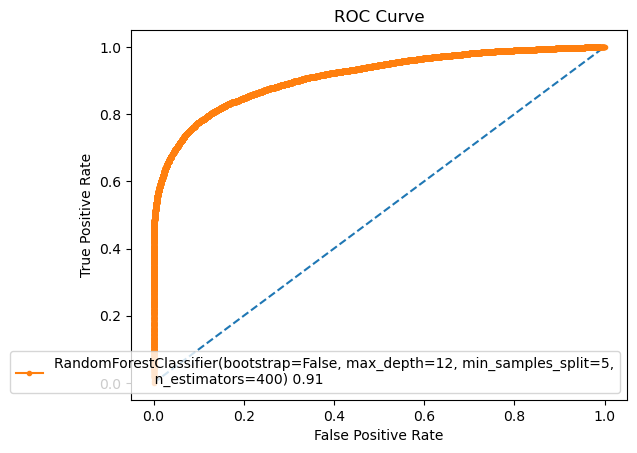

In [864]:
#AOC
def aoc(model,xtest_data,ytest_data):
    probs = model.predict_proba(xtest_data)
# keep probabilities for the positive outcome only
    probs = probs[:, 1]
# calculate AUC
    auc = metrics.roc_auc_score(ytest_data, probs)
    print('AUC: %.3f' % auc)
# calculate roc curve
    fpr, tpr, thresholds = metrics.roc_curve(ytest_data, probs)
# plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.',label='{} {}'.format(model,np.round(auc,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
   # show the plot
    plt.show()
aoc(rf_hp,Xtest_PCA,ytest)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     30066
           1       0.94      0.62      0.75     17690

    accuracy                           0.85     47756
   macro avg       0.88      0.80      0.82     47756
weighted avg       0.86      0.85      0.84     47756



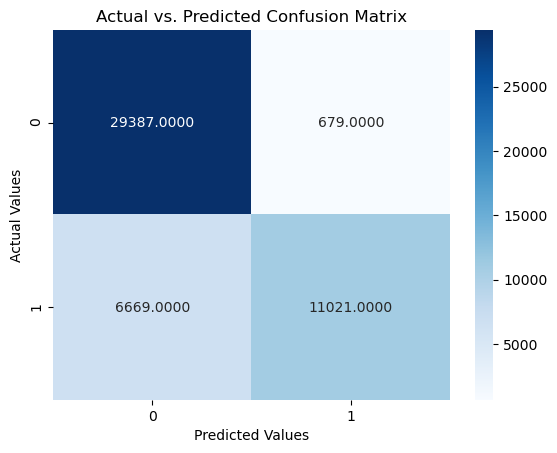

In [866]:
pred = rf_hp.predict(Xtest_PCA)
print(metrics.classification_report(ytest,pred))
cm = metrics.confusion_matrix(ytest,pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.4f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

# we can see the over fitting is reduced but recall of cancellation is also reduced .


In [868]:
#the overall accuracy is 85% and precision and recall are also good 88 and 80%,but we need to improve the recall for cancellation prediction 